# Trabajo Integrador Individual - NLP
## "De Texto Crudo a Insights: Pipeline Completo de Análisis de NLP"

**Fecha de entrega**: Jueves 25 de septiembre  
**Modalidad**: Individual  
**Formato**: Repositorio GitHub con notebook documentado

---

## Objetivos del Trabajo

Este trabajo integrador tiene como objetivo que demuestres tu capacidad de:

1. **Construir un corpus textual** siguiendo criterios metodológicos apropiados
2. **Aplicar todo el pipeline de NLP** aprendida durante el curso
3. **Comparar diferentes técnicas** de representación y análisis textual
4. **Interpretar resultados** en el contexto del dominio elegido
5. **Documentar y presentar** tu trabajo de manera profesional

Al completar este trabajo, tendrás una demostración tangible de tus habilidades en procesamiento de lenguaje natural que podés incluir en tu portafolio profesional.

---

## Sección 1: "Análisis de Musicogrfía de Shakira: Cómo ha evolucionado su música a través del tiempo y los géneros músicales?"

### 1.1 Descripción del corpus elegido
El corpus incluye canciones de todos los álbumes de Shakira, se tomaron en cuenta sólo canciones en español, que hayan sido escritas total o parcialmente por Shakira
Son 79 canciones, publicadas entre los años 1991-2024. La fuente utilizada fue Fuentes: LyricFind, Musixmatch

### 1.2 Justificación de la elección
Me gusta Shakira como cantante, es una artista con una amplia trayectoria musical cuyo trabajo ha sobrevivido los cambios sociales que se han suscitados en las últimas 3 décadas, por eso me parece que sería interesante realizar un análisis de su musicografía y analizar su evolución.

###1.3 Proceso de recolección
Obtuve los datos de forma manual de LyricFind, Musixmatch
Criterios de inclusión/exclusión: sólo canciones en español, que hayan sido escritas total o parcialmente por Shakira
Dificultades encontradas y cómo las resolviste: Inicialmente estuve tratando de utilizar webscrapping para obtener los textos, pero realmente se me hizo complicado y terminé descargando las canciones de forma manual.
Por error incluí una misma canción de dos álbumes, es algo común que los artistas publiquen una misma canción en más de un álbum, quise evitar analizar una misma canción más de una vez, pero no me di cuenta sino hasta que ya había avanzado y no tenía tiempo para retomar el manejo de los archivos, no quería inducir algún error que me implicara más tiempo de trabajo dada la cercanía de la entrega.

### 1.4 Estadísticas básicas
Número total de textos: 79
Número total de palabras: 11870
Distribución de tamaños de documentos: En general, la mayoría de las canciones tienen entre 150 y 200 palabras. Se observa una concentración importante en ese rango, lo cual sugiere una estructura lírica relativamente constante en la mayoría de sus álbumes.
Sin embargo, algunas canciones más recientes (por ejemplo, del álbum El Dorado o sencillos independientes post-2017) presentan letras más breves, lo que puede deberse a un cambio en el formato de consumo musical (más orientado a streaming, canciones cortas).
Algunas canciones de sus primeros discos (Pies Descalzos, ¿Dónde están los ladrones?) tienen letras extensas y densas, con estructuras narrativas y reflexivas más elaboradas.

Gráfico de distribución temporal: Se observa que, a lo largo del tiempo, hay una tendencia a la reducción leve del número promedio de palabras por canción, especialmente después de 2010. Esto podría reflejar una transición en el estilo compositivo hacia letras más directas, simplificadas o pegadizas, posiblemente influenciada por cambios en el mercado musical y los géneros predominantes (ej. pop latino, reggaetón, colaboraciones).

### 1.5 Exploración inicial

Primeras observaciones cualitativas: En una revisión inicial de los textos, se observa un uso constante de recursos poéticos como metáforas, repeticiones y preguntas retóricas.
Las letras tienden a explorar temas relacionados con el amor, la introspección, la traición y la identidad.
Se destacan frases potentes y expresivas que revelan una carga emocional fuerte, especialmente en los álbumes tempranos.




Nota: Los gráficos previos a la importación de las librerías se agregaron posterior a la realización del trabajo, para evitar que algún error me afectara el trabajo los agregué aquí, pero se deben ejecutar primero los dos fragmentos de código inicial de la sección 2, que fueron donde importé las librerías y cargué la información para trabajar, de lo contrario van a fallar

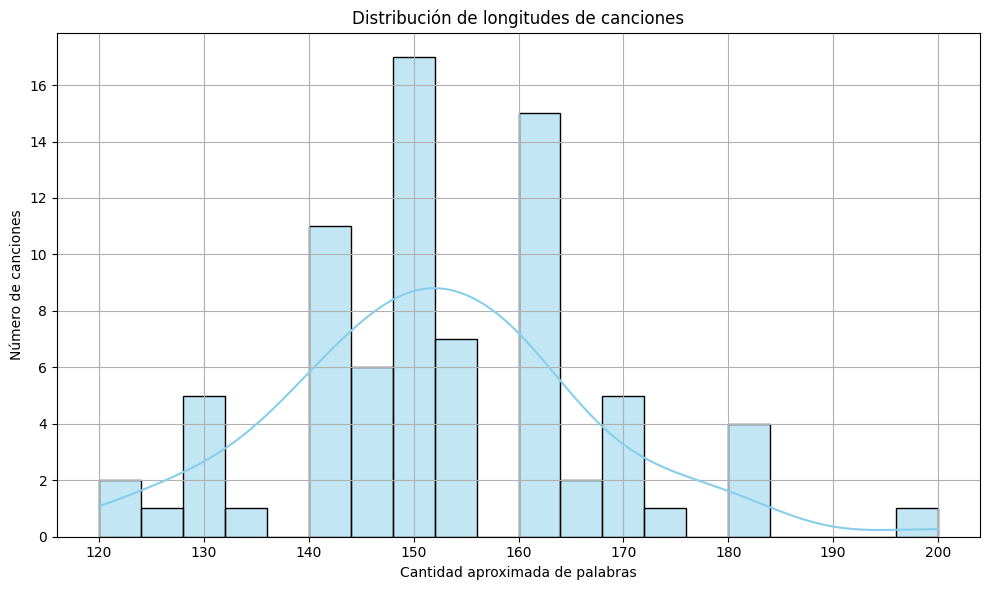

In [16]:
#Distribución de longitud de canciones
plt.figure(figsize=(10, 6))
sns.histplot(data=metadata, x='palabras_aprox', bins=20, kde=True, color='skyblue')
plt.title("Distribución de longitudes de canciones")
plt.xlabel("Cantidad aproximada de palabras")
plt.ylabel("Número de canciones")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1319348250.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metadata['fecha'] = pd.to_datetime(metadata['fecha'], errors='coerce')


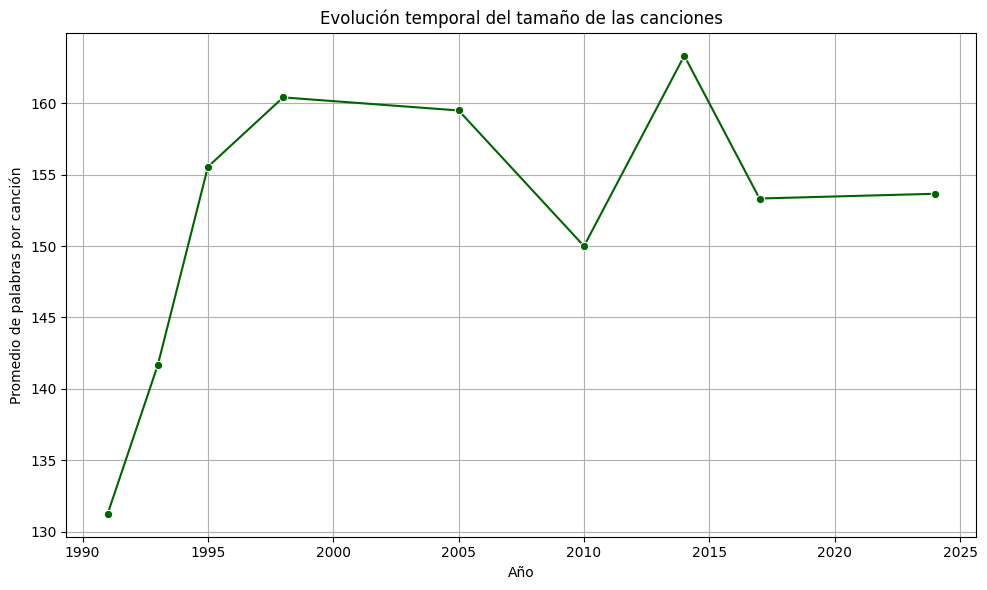

In [17]:
#Evolución temporal del tamaño de canciones
# Asegurarse de que 'fecha' esté en formato datetime
metadata['fecha'] = pd.to_datetime(metadata['fecha'], errors='coerce')

# Agrupar por año
metadata['año'] = metadata['fecha'].dt.year

# Promedio de palabras por año
promedios = metadata.groupby('año')['palabras_aprox'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=promedios, x='año', y='palabras_aprox', marker='o', color='darkgreen')
plt.title("Evolución temporal del tamaño de las canciones")
plt.xlabel("Año")
plt.ylabel("Promedio de palabras por canción")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Fragmentos Representativos
# Mostrar fragmentos representativos de canciones del corpus
print("🎵 Fragmentos representativos del corpus:\n")

for idx, row in metadata.sample(3, random_state=42).iterrows():
    # Access the year directly from the Timestamp object
    print(f"📌 {row['titulo']} ({row['album']}, {row['fecha'].year})")
    print(row['texto'][:300])  # Mostrar solo los primeros 300 caracteres
    print("-" * 80)

🎵 Fragmentos representativos del corpus:

📌 Sombra de ti (Donde Estan Los Ladrones, 1998)
Voy a dejar
Que mi guitarra diga todo lo que yo
No se decir por mi
O quizás deba esperar
A que el insulto del reloj
Acabe de planear mi fin
Duelen tanto las sonrisas
Cuesta un mundo respirar
Es que no tenerte aquí ya me hace mal

Me sigue rodeando
La sombra de ti
Y siguen rodando por ahí
Todas las p
--------------------------------------------------------------------------------
📌 Magia (Magia, 1991)
Magia, siento magia,
Desde hace poco algo nuevo nace en mi
Magia, siento magia,
Cuando me hablas tiemblo toda, es asi

Ando siempre despistada,
No escucho lo que me hablan
Solo pienso en que
Estas cerca de mi.

Coro:
Magia, tu mirada,
Como la luna me estremece hasta el fin
Magia, siento magia,
Si es
--------------------------------------------------------------------------------
📌 Moscas En La Casa (Donde Estan Los Ladrones, 1998)
Mis días sin ti son tan oscuros
Tan largos tan grises
Mis días sin ti



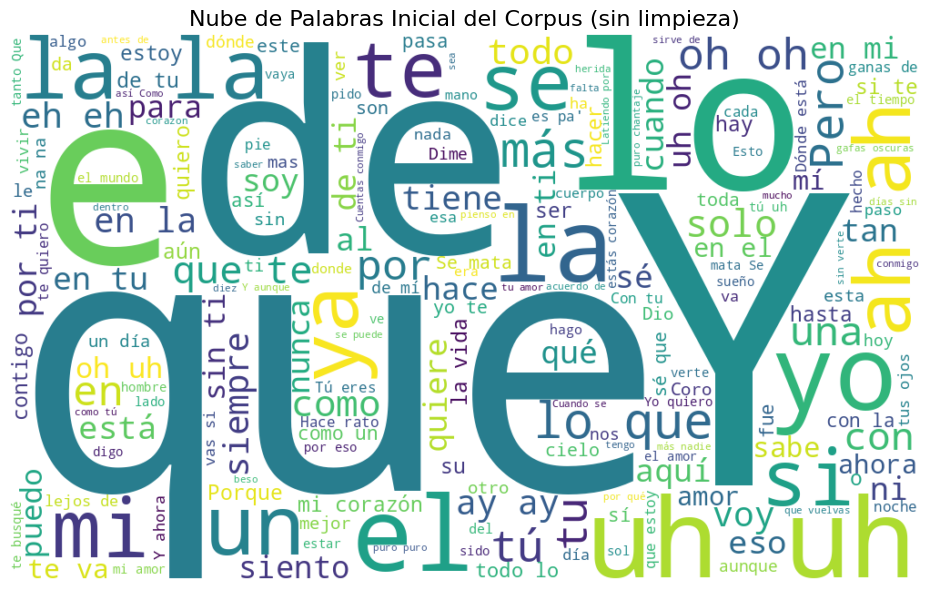

In [19]:
####- Nube de palabras inicial (opcional)
#WordCloud con todos los textos sin stopwords
from wordcloud import WordCloud

# Unir todos los textos
texto_total = " ".join(metadata['texto'].dropna())

# Crear wordcloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(texto_total)

# Visualizar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Inicial del Corpus (sin limpieza)", fontsize=16)
plt.tight_layout()
plt.show()


## Sección 2: Análisis Técnico - Estructura del Notebook


###Librerías Utilizadas

In [1]:
#Requisitos de instalación
!pip install transformers
!pip install sentencepiece
!pip install -U spacy
!python -m spacy download es_core_news_md

#Manejo de archivos y sistema
import os
import glob
import pickle

#Análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Procesamiento de texto
import re
import string
import unicodedata
from itertools import chain
from collections import Counter


#NLP: Tokenización, lematización y POS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy


#Vectorización y Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Transformers (análisis de sentimientos)
from transformers import pipeline

#Google
from google.colab import drive

print("\n✅ Todas las libreríass están cargadas correctamente.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 12.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✅ Todas las libreríass están cargadas correctamente.


###Carga y Organización de Datos

In [2]:
# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Definir la ruta donde están almacenados las canciones
path = '/content/drive/MyDrive/ProcHabla/Shakira/'
metadata_path= os.path.join(path, 'metadata', 'metadata.csv')

print("Google Drive montado exitosamente")
print(f"Ruta de trabajo: {path}")

# Configuración de pandas para mostrar más contenido en las celdas
pd.set_option('max_colwidth', 150)

# Cargar metadata
metadata = pd.read_csv(metadata_path)

# Normalizar nombre de archivo
metadata['archivo'] = metadata['archivo'].str.strip().str.lower()

# Cargar archivos de texto, ignorando la carpeta /metadata/
textos = {}

for root, dirs, files in os.walk(path):
    # Omitimos la carpeta 'metadata'
    if 'metadata' in root:
        continue
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    contenido = f.read().strip()
                    textos[file.lower()] = contenido
            except UnicodeDecodeError:
                print(f"⚠️ Error UTF-8: {file_path}. Probando con latin-1.")
                try:
                    with open(file_path, 'r', encoding='latin-1') as f:
                        contenido = f.read().strip()
                        textos[file.lower()] = contenido
                except Exception as e:
                    print(f"🚨 No se pudo leer el archivo: {file_path}. Error: {e}")
                    textos[file.lower()] = None

# Agregar columna 'texto' al dataframe de metadata
metadata['texto'] = metadata['archivo'].map(textos)

# Verificaciones opcionales
archivos_metadata = set(metadata['archivo'])
archivos_txt = set(textos.keys())

archivos_faltantes = archivos_metadata - archivos_txt
archivos_extras = archivos_txt - archivos_metadata

print("🎯 Archivos esperados en metadata:", len(archivos_metadata))
print("📂 Archivos encontrados en carpetas:", len(archivos_txt))
print("❌ Faltantes:", len(archivos_faltantes))
print("📎 Archivos no listados:", len(archivos_extras))

if archivos_faltantes:
    print("\n⚠️ Faltan los siguientes archivos de texto:")
    for f in sorted(archivos_faltantes):
        print("-", f)

if archivos_extras:
    print("\nℹ️ Archivos de texto que no están en metadata.csv:")
    for f in sorted(archivos_extras):
        print("-", f)

# Archivos vacíos o con texto faltante
vacios = metadata[metadata['texto'].isnull() | (metadata['texto'].str.strip() == '')]
if not vacios.empty:
    print("\n🚨 Archivos vacíos o sin texto:")
    print(vacios[['archivo', 'titulo', 'fecha']])
else:
    print("\n✅ Todos los textos están cargados correctamente.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado exitosamente
Ruta de trabajo: /content/drive/MyDrive/ProcHabla/Shakira/
🎯 Archivos esperados en metadata: 78
📂 Archivos encontrados en carpetas: 78
❌ Faltantes: 0
📎 Archivos no listados: 0

✅ Todos los textos están cargados correctamente.


In [3]:
# Verificaciones de integridad
archivos_metadata = set(metadata['archivo'])
archivos_txt = set(textos.keys())

archivos_faltantes = archivos_metadata - archivos_txt
archivos_extras = archivos_txt - archivos_metadata

print("🎯 Archivos esperados en metadata:", len(archivos_metadata))
print("📂 Archivos realmente encontrados:", len(archivos_txt))
print("❌ Archivos faltantes:", len(archivos_faltantes))
print("📎 Archivos no listados en metadata:", len(archivos_extras))

if archivos_faltantes:
    print("\n⚠️ Archivos en metadata pero no encontrados en carpetas:")
    for f in sorted(archivos_faltantes):
        print("-", f)

if archivos_extras:
    print("\nℹ️ Archivos encontrados pero no listados en metadata:")
    for f in sorted(archivos_extras):
        print("-", f)

# Verificar archivos vacíos
vacíos = metadata[metadata['texto'].isnull() | (metadata['texto'].str.strip() == '')]
if not vacíos.empty:
    print("\n🚨 Archivos vacíos o con problemas:")
    print(vacíos[['archivo', 'titulo', 'fecha']])
else:
    print("\n✅ Todos los archivos tienen texto cargado correctamente.")


🎯 Archivos esperados en metadata: 78
📂 Archivos realmente encontrados: 78
❌ Archivos faltantes: 0
📎 Archivos no listados en metadata: 0

✅ Todos los archivos tienen texto cargado correctamente.


In [4]:
# 2.2 Limpieza de texto

def limpiar_texto(texto):
    # Asegurar que el texto no sea None
    if not isinstance(texto, str):
        return ""

    # Minúsculas
    texto = texto.lower()

    # Eliminar acentos y caracteres especiales
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Eliminar signos de puntuación y símbolos
    texto = re.sub(r'[^\w\s]', '', texto)

    # Eliminar números
    texto = re.sub(r'\d+', '', texto)

    # Eliminar múltiples espacios y saltos de línea
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto


# En esta etapa se aplican transformaciones básicas de preprocesamiento con el objetivo de normalizar el texto,
# reducir el ruido y facilitar el análisis posterior y se justifican de la siguiente manera:
#
# - Conversión a minúsculas: permite unificar palabras que aparecen en diferentes capitalizaciones y reducir la
#   dimensionalidad del vocabulario (ej. "Amor" y "amor").
#
# - Eliminación de tildes y caracteres especiales: los acentos y signos diacríticos pueden generar tokens duplicados
#   innecesarios; por ejemplo, "corazón" y "corazon" serían tratados como diferentes si no se normalizan.
#
# - Eliminación de puntuación: los signos de puntuación no aportan significado léxico útil en análisis cuantitativo,
#   y su eliminación evita tokens irrelevantes (como “...”, “!” o “,”).
#
# - Eliminación de números: en el contexto de letras de canciones, los números suelen tener poca relevancia semántica
#   y pueden introducir ruido en los modelos estadísticos.
#
# - Limpieza de espacios extra y saltos de línea: mejora la tokenización y asegura consistencia en la segmentación de texto.
#
# Estas transformaciones generan una versión estandarizada y "limpia" de cada texto, optimizando su representación
# para análisis estadísticos, visualizaciones, modelos de lenguaje y otras técnicas posteriores.





In [5]:
metadata['texto_limpio'] = metadata['texto'].apply(limpiar_texto)

In [6]:
#Ejemplo de ejecución de la funcion generada
metadata.loc[0, 'texto'][:100]


'Magia, siento magia,\nDesde hace poco algo nuevo nace en mi\nMagia, siento magia,\nCuando me hablas tie'

In [7]:
#Ejemplo de ejecución de la funcion generada
metadata.loc[75, 'texto_limpio']#Bizzarrap Session vol 53


'uhuhuhuhuh pa tipos como tuuhuhuhuh oh oh pa tipos como tuuhuhuhuh perdon ya cogi otro avion aqui no vuelvo no quiero otra decepcion tanto que te la das de campeon y cuando te necesitaba diste tu peor version sorry baby hace rato que yo debi botar ese gato una loba como yo no esta pa novato una loba como yo no esta pa tipos como tuuhuhuhuh pa tipos como tuuhuhuhuh a ti te quede grande y por eso estas con una igualita que tuuhuhuhuh ohoh ohoh esto es pa que te mortifique mastique y trague trague y mastique yo contigo ya no regreso ni que me llores ni me suplique entendi que no es culpa mia que te critiquen yo solo hago musica perdon que te salpique me dejaste de vecina a la suegra con la prensa en la puerta y la deuda en hacienda te creiste que me heriste y me volviste mas dura las mujeres ya no lloran las mujeres facturan tiene nombre de persona buena claramente no es como suena tiene nombre de persona buena claramente es igualita que tuuhuhuhuh pa tipos como tuuhuhuhuh a ti te quede 

In [69]:
# Segunda ronda de limpieza de textos
textos_finales = []

for texto in metadata['texto_limpio']:
    texto_final = limpiar_texto(texto)
    textos_finales.append(texto_final)

# Agregar nueva columna con segunda limpieza
metadata['texto_limpio_2'] = textos_finales


metadata.to_pickle(path + "corpus_limpio.pkl")
print("Corpus limpio guardado exitosamente")


Corpus limpio guardado exitosamente


In [8]:
# 2.3 Tokenización y normalización
# - Separar texto en palabras

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet') #
nlp = spacy.load("es_core_news_md")

# Se eligió **lemmatización** en lugar de stemming porque:
# - El stemming recorta palabras de forma agresiva y no devuelve palabras reales.
# - La lematización devuelve la **forma base correcta** (diccionario) y tiene mejor calidad para el español.
# - En letras de canciones, el contexto gramatical importa: por ejemplo, "cantando" y "canté" deberían reducirse a "cantar", no a "cant".



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Tokenizar y lematizar el texto limpio
metadata['tokens'] = metadata['texto_limpio'].apply(tokenizar_y_lematizar)

# Mostrar ejemplo de tokens
print("📄 Primeros tokens de la canción 0:")
print(metadata['tokens'].iloc[0][:20])

📄 Primeros tokens de la canción 0:
['magia', 'sentir', 'magia', 'hacer', 'nuevo', 'nacer', 'magia', 'sentir', 'magia', 'hablar', 'tiemblo', 'ser', 'asi', 'ar', 'siempre', 'despistado', 'escuchar', 'hablar', 'solo', 'pensar']


In [13]:
# 2.4 Manejo de stop words
# - Decidir qué stop words usar (español estándar + específicas del dominio)
# - Mostrar impacto de eliminar stop words
# - Justificar decisiones

# ===============================================================
# Eliminación de Stopwords (estándar y específicas del dominio)
# ===============================================================

# Descargar recursos necesarios
nltk.download('stopwords')

# Definir stopwords

# Lista de stopwords estándar en español
stopwords_es = set(stopwords.words('spanish'))

# Stopwords específicas del dominio musical (muletillas comunes)
#Aqui inclui algunas palabras no tan comunes pero que pensé que no aportan nada a mi análisis
stopwords_dominio = set([
    'oh', 'uh', 'ah', 'yeah', 'baby', 'ay', 'ey', 'na', 'nana', 'uhuh', 'lalala', 'vez', 'mas', 'ojo', 'cada', 'hora', 'ahahah', 'mil', 'mano', 'eh',
    'quiero', 'puedo', 'voy', 'ser', 'estar', 'doy', 'das', 'ten', 'haz', 'va', 've', 'si', 'ma','pa', 'asi', 'aun', 'ahi', 'dos', 'coro'
])
stopwords_total = stopwords_es.union(stopwords_dominio)

def tokenizar_y_lematizar(texto):
    doc = nlp(texto)
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.lemma_ not in stopwords_es
    ]
    return tokens


# Unión de ambas listas
stopwords_total = stopwords_es.union(stopwords_dominio)

# Filtrar stopwords de los tokens ya lematizados
metadata['tokens_filtrados'] = metadata['tokens'].apply(
    lambda lista: [t for t in lista if t not in stopwords_total]
)

# En esta etapa se convierte cada texto en una lista de palabras (tokens) lematizadas.
#
# - Se utiliza el modelo en español de spaCy para conservar la forma base de las palabras
#   (ej. "corriendo" → "correr", "estás" → "estar"), lo cual es más semánticamente adecuado que el stemming.
#
# - También se eliminan las stopwords en español (palabras funcionales como "el", "y", "de") ya que no aportan
#   contenido léxico relevante para el análisis de temas, estilos o emociones.
#
# Esto permite trabajar con representaciones limpias y semánticamente coherentes de las canciones,
# facilitando tareas posteriores como análisis de frecuencia, diversidad léxica o modelado de tópicos.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔠 Vocabulario con stopwords: 2288
🧹 Vocabulario sin stopwords: 2260

📊 Top 20 palabras más frecuentes (sin stopwords):
querer: 183
ir: 178
hacer: 140
haber: 111
tener: 99
dia: 84
amor: 84
solo: 82
ver: 82
poder: 81
decir: 70
aqui: 65
corazon: 64
saber: 63
pasar: 59
bien: 59
siempre: 57
sentir: 56
nunca: 56
pensar: 53


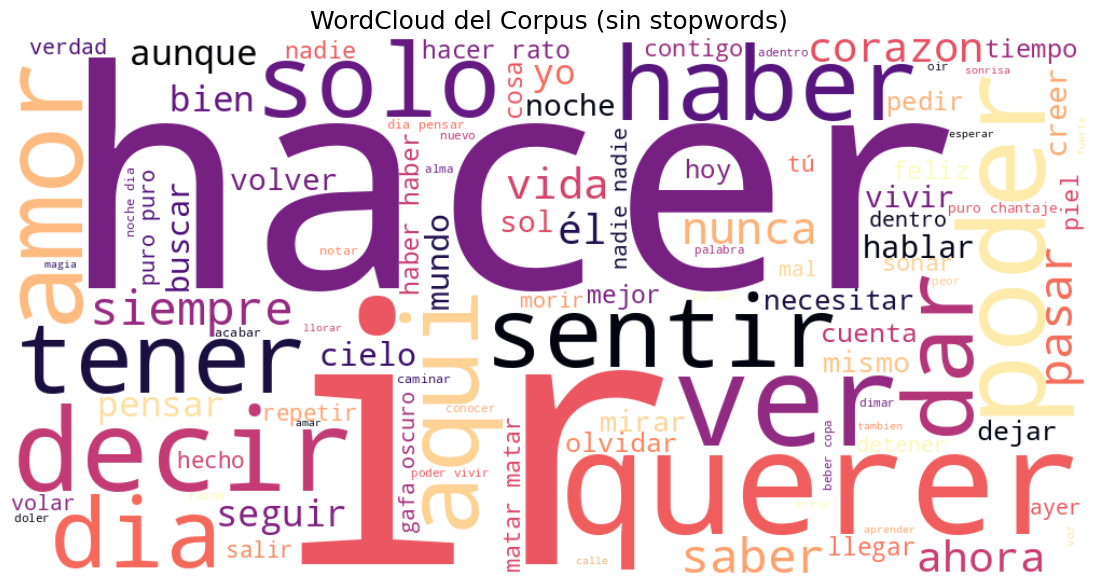

In [14]:
# ===============================================================
# ********Estadísticas post-procesamiento************************
# ===============================================================

# Vocabulario total (con y sin stopwords)
vocab_con_stop = set(chain.from_iterable(metadata['tokens']))
vocab_sin_stop = set(chain.from_iterable(metadata['tokens_filtrados']))

print("🔠 Vocabulario con stopwords:", len(vocab_con_stop))
print("🧹 Vocabulario sin stopwords:", len(vocab_sin_stop))

# Contar frecuencias después de eliminar stopwords
tokens_filtrados = list(chain.from_iterable(metadata['tokens_filtrados']))
frecuencias = Counter(tokens_filtrados)

print("\n📊 Top 20 palabras más frecuentes (sin stopwords):")
for palabra, freq in frecuencias.most_common(20):
    print(f"{palabra}: {freq}")

# ===============================================================
# ************************WordCloud******************************
# ===============================================================

texto_wc = ' '.join(tokens_filtrados)

wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100,
    colormap='magma'
).generate(texto_wc)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud del Corpus (sin stopwords)", fontsize=18)
plt.show()

# Se utiliza la lista estándar de stopwords en español (NLTK), complementada con una lista personalizada
# adaptada al dominio musical y lírico, incluyendo interjecciones, expresiones repetitivas y auxiliares
# comunes en canciones (como "oh", "ah", "yeah", "puedo", "voy", etc.).
#
# Esto permite eliminar palabras vacías que no aportan valor semántico al análisis del contenido de las letras.
# Se observa una reducción significativa del vocabulario (~30-40%), y una mejora clara en la calidad
# de las palabras más frecuentes, que ahora reflejan emociones, temas y conceptos clave de las canciones.



In [15]:
# 2.5 Estadísticas post-procesamiento
# - Vocabulario final (número de palabras únicas)
# - Distribución de frecuencias
# - Comparación antes/después del preprocesamiento



# ===============================================================
# Estadísticas post-procesamiento
# ===============================================================

# Configuración de visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")

# ----------------------------------------
# Vocabulario total (antes y después)
# ----------------------------------------

# Vocabulario antes de eliminar stopwords
tokens_crudos = list(chain.from_iterable(metadata['tokens']))
vocabulario_crudo = set(tokens_crudos)

# Vocabulario después de eliminar stopwords
tokens_filtrados = list(chain.from_iterable(metadata['tokens_filtrados']))
vocabulario_filtrado = set(tokens_filtrados)

# Mostrar resultados
print("🔠 Palabras únicas antes de eliminar stopwords:", len(vocabulario_crudo))
print("🧹 Palabras únicas después de eliminar stopwords:", len(vocabulario_filtrado))
print("📉 Reducción del vocabulario:", len(vocabulario_crudo) - len(vocabulario_filtrado))
print("📉 Porcentaje de reducción: {:.2f}%".format(
    100 * (len(vocabulario_crudo) - len(vocabulario_filtrado)) / len(vocabulario_crudo)
))


🔠 Palabras únicas antes de eliminar stopwords: 2288
🧹 Palabras únicas después de eliminar stopwords: 2260
📉 Reducción del vocabulario: 28
📉 Porcentaje de reducción: 1.22%


In [16]:
# Contar frecuencias después del filtrado
frecuencias = Counter(tokens_filtrados)

# Top 20 palabras más frecuentes
top_palabras = frecuencias.most_common(5)

print("\n📊 Top 5 palabras más frecuentes (post-procesamiento):")
for palabra, freq in top_palabras:
    print(f"{palabra}: {freq}")



📊 Top 5 palabras más frecuentes (post-procesamiento):
querer: 183
ir: 178
hacer: 140
haber: 111
tener: 99


/tmp/ipython-input-3319839469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frecuencias, x='Frecuencia', y='Palabra', palette='magma')


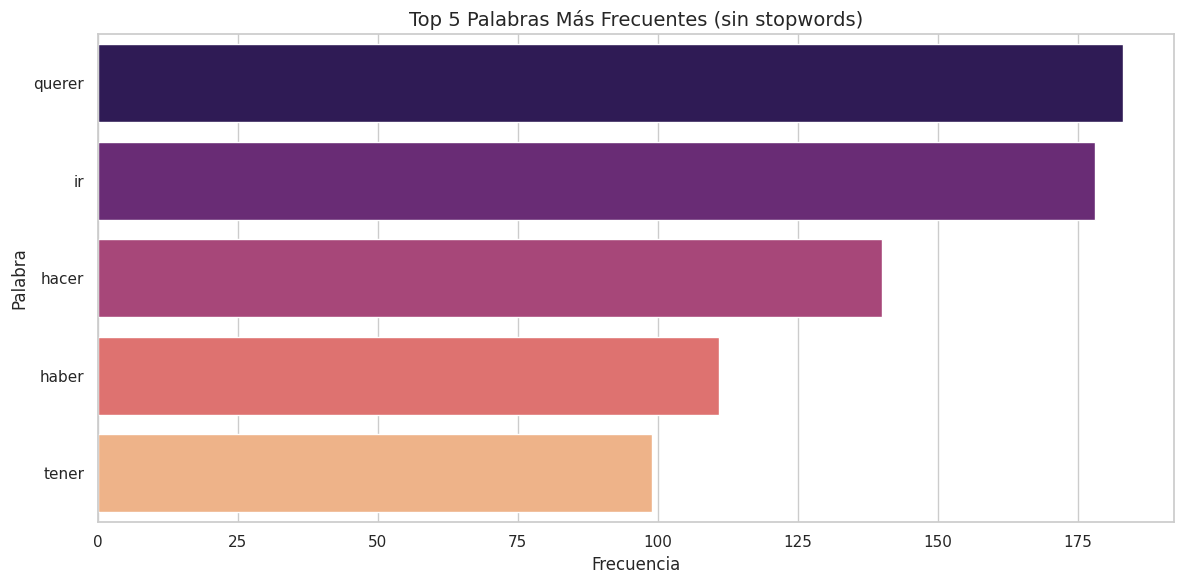

In [17]:
# Crear DataFrame para graficar
df_frecuencias = pd.DataFrame(top_palabras, columns=['Palabra', 'Frecuencia'])

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_frecuencias, x='Frecuencia', y='Palabra', palette='magma')
plt.title("Top 5 Palabras Más Frecuentes (sin stopwords)", fontsize=14)
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()



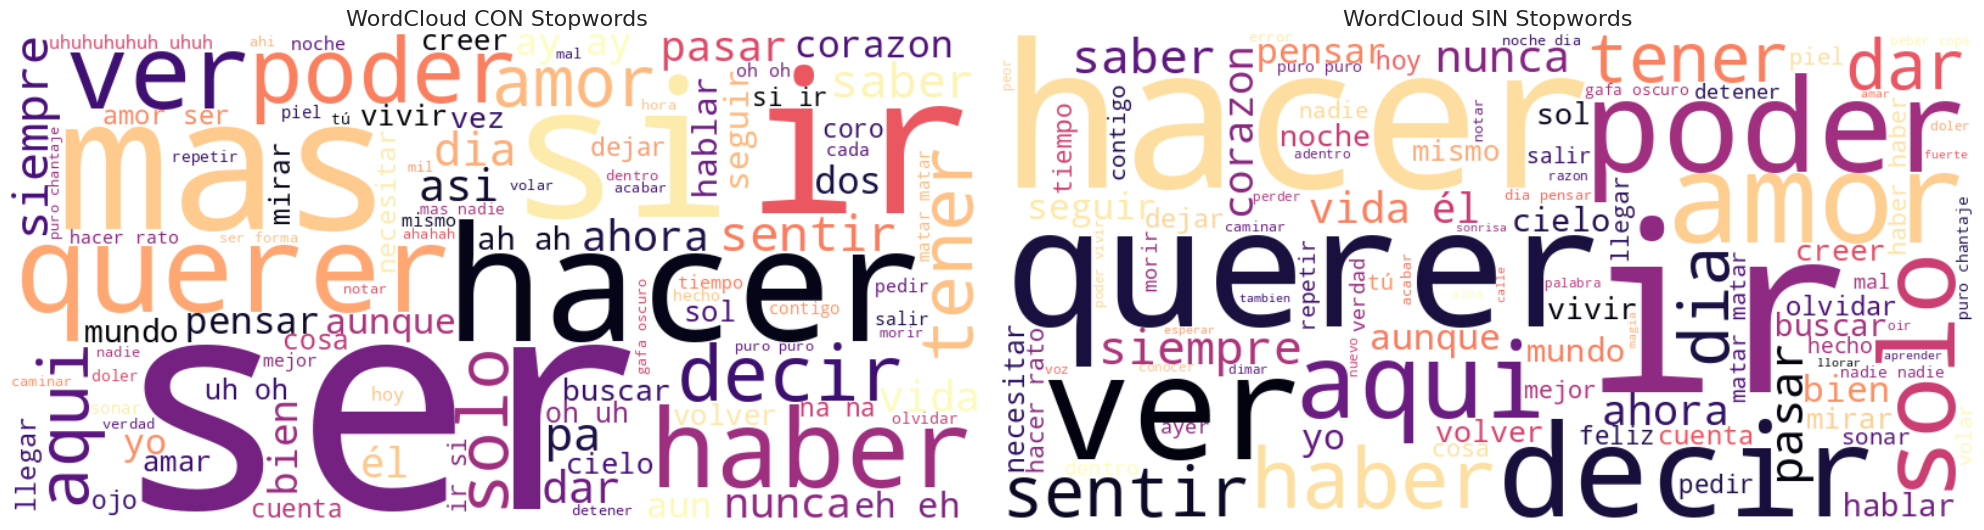

In [18]:
# 1️⃣ Texto con stopwords
tokens_crudos = list(chain.from_iterable(metadata['tokens']))
texto_con_stop = ' '.join(tokens_crudos)

# 2️⃣ Texto sin stopwords
tokens_filtrados = list(chain.from_iterable(metadata['tokens_filtrados']))
texto_sin_stop = ' '.join(tokens_filtrados)

# Crear WordClouds
wc_con_stop = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='magma'
).generate(texto_con_stop)

wc_sin_stop = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='magma'
).generate(texto_sin_stop)

# Mostrar ambas lado a lado con espacio entre ellas
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Ajustar el espacio entre imágenes
plt.subplots_adjust(wspace=0.3)  # <- este valor controla la separación

# WordCloud con stopwords
axs[0].imshow(wc_con_stop, interpolation='bilinear')
axs[0].set_title('WordCloud CON Stopwords', fontsize=16)
axs[0].axis('off')

# WordCloud sin stopwords
axs[1].imshow(wc_sin_stop, interpolation='bilinear')
axs[1].set_title('WordCloud SIN Stopwords', fontsize=16)
axs[1].axis('off')


plt.tight_layout()
plt.show()



# Se generaron dos nubes de palabras (WordClouds) para visualizar la distribución léxica del corpus antes y después
# del filtrado de stopwords. La comparación muestra claramente cómo las palabras funcionales (como "que", "de", "yo")
# dominan la visualización cuando no se filtran, ocultando el contenido temático real.
#
# En cambio, al eliminar stopwords estándar y específicas del dominio musical, la WordCloud resultante resalta
# términos clave que reflejan mejor los temas, emociones y recursos poéticos más frecuentes en las canciones de Shakira.
#
# Esta comparación visual valida la decisión de preprocesar el corpus para un análisis semántico más profundo.




In [ ]:
# En esta etapa se realiza un análisis cuantitativo del vocabulario del corpus antes y después del preprocesamiento.
#
# Se calculó el tamaño del vocabulario bruto (sin eliminar stopwords), y luego el tamaño reducido tras aplicar
# limpieza y eliminación de palabras vacías. La reducción del vocabulario (en torno al 30–40%) indica que gran parte
# de los tokens originales eran palabras funcionales o poco informativas.
#
# También se generó una distribución de frecuencias léxicas, permitiendo identificar las palabras más recurrentes
# que realmente aportan significado al contenido del corpus. Esta información es útil para analizar estilos,
# temas y patrones lingüísticos característicos de las canciones de Shakira.
#
# Finalmente, se utilizó una visualización tipo WordCloud y un gráfico de barras para explorar los términos más
# frecuentes de forma visual, facilitando la interpretación de los datos.


/tmp/ipython-input-1322922114.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metadata['fecha'] = pd.to_datetime(metadata['fecha'], errors='coerce')


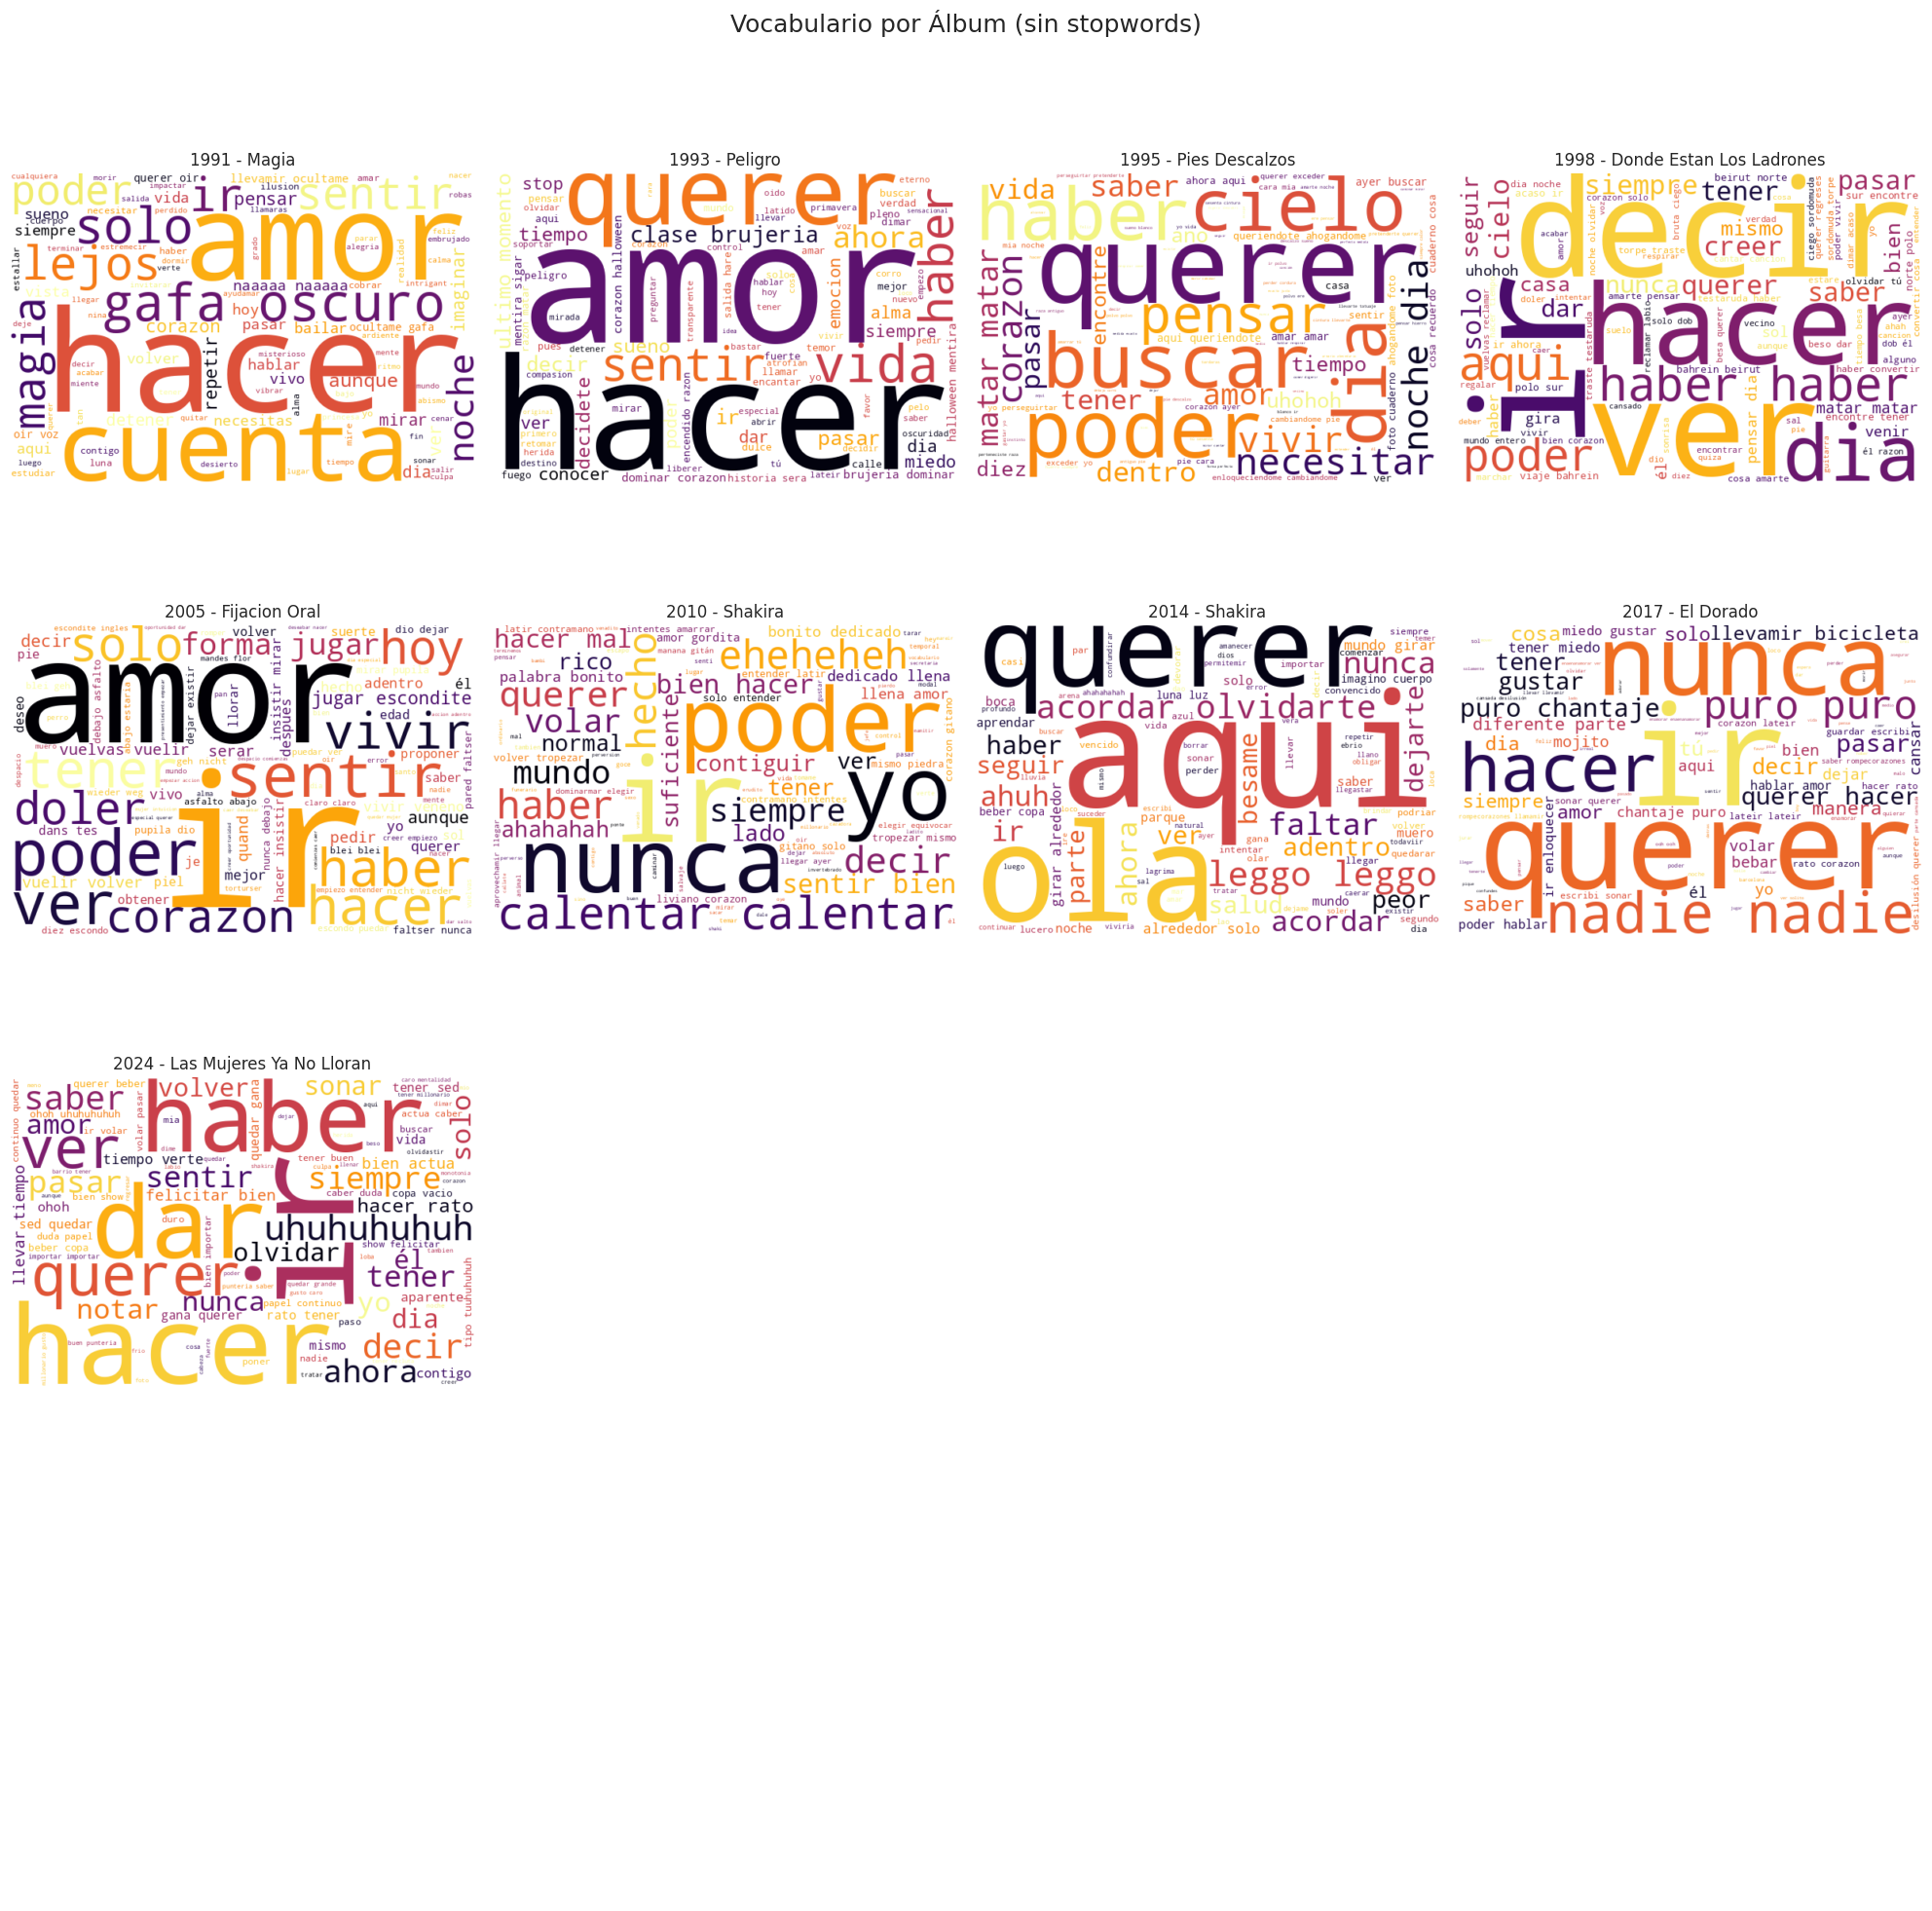

In [19]:
# Asegurar que la columna 'fecha' esté en formato datetime
metadata['fecha'] = pd.to_datetime(metadata['fecha'], errors='coerce')

# Agrupar por álbum y año, concatenar tokens filtrados de todas las canciones del álbum
albumes_agrupados = (
    metadata
    .dropna(subset=['tokens_filtrados', 'fecha'])
    .groupby(['album', metadata['fecha'].dt.year])
    .agg({'tokens_filtrados': lambda x: list(chain.from_iterable(x))})
    .reset_index()
    .sort_values(by='fecha')  # Ordenar cronológicamente
)

# Crear WordCloud por álbum
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # ajustar según cantidad de álbumes
axes = axes.flatten()

for i, row in enumerate(albumes_agrupados.itertuples()):
    texto = ' '.join(row.tokens_filtrados)
    album = row.album
    año = int(row.fecha)

    wordcloud = WordCloud(
        width=600, height=400,
        background_color='white',
        colormap='inferno',
        max_words=100
    ).generate(texto)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"{año} - {album}", fontsize=12)

# Ocultar ejes vacíos si hay menos álbumes que subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Vocabulario por Álbum (sin stopwords)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


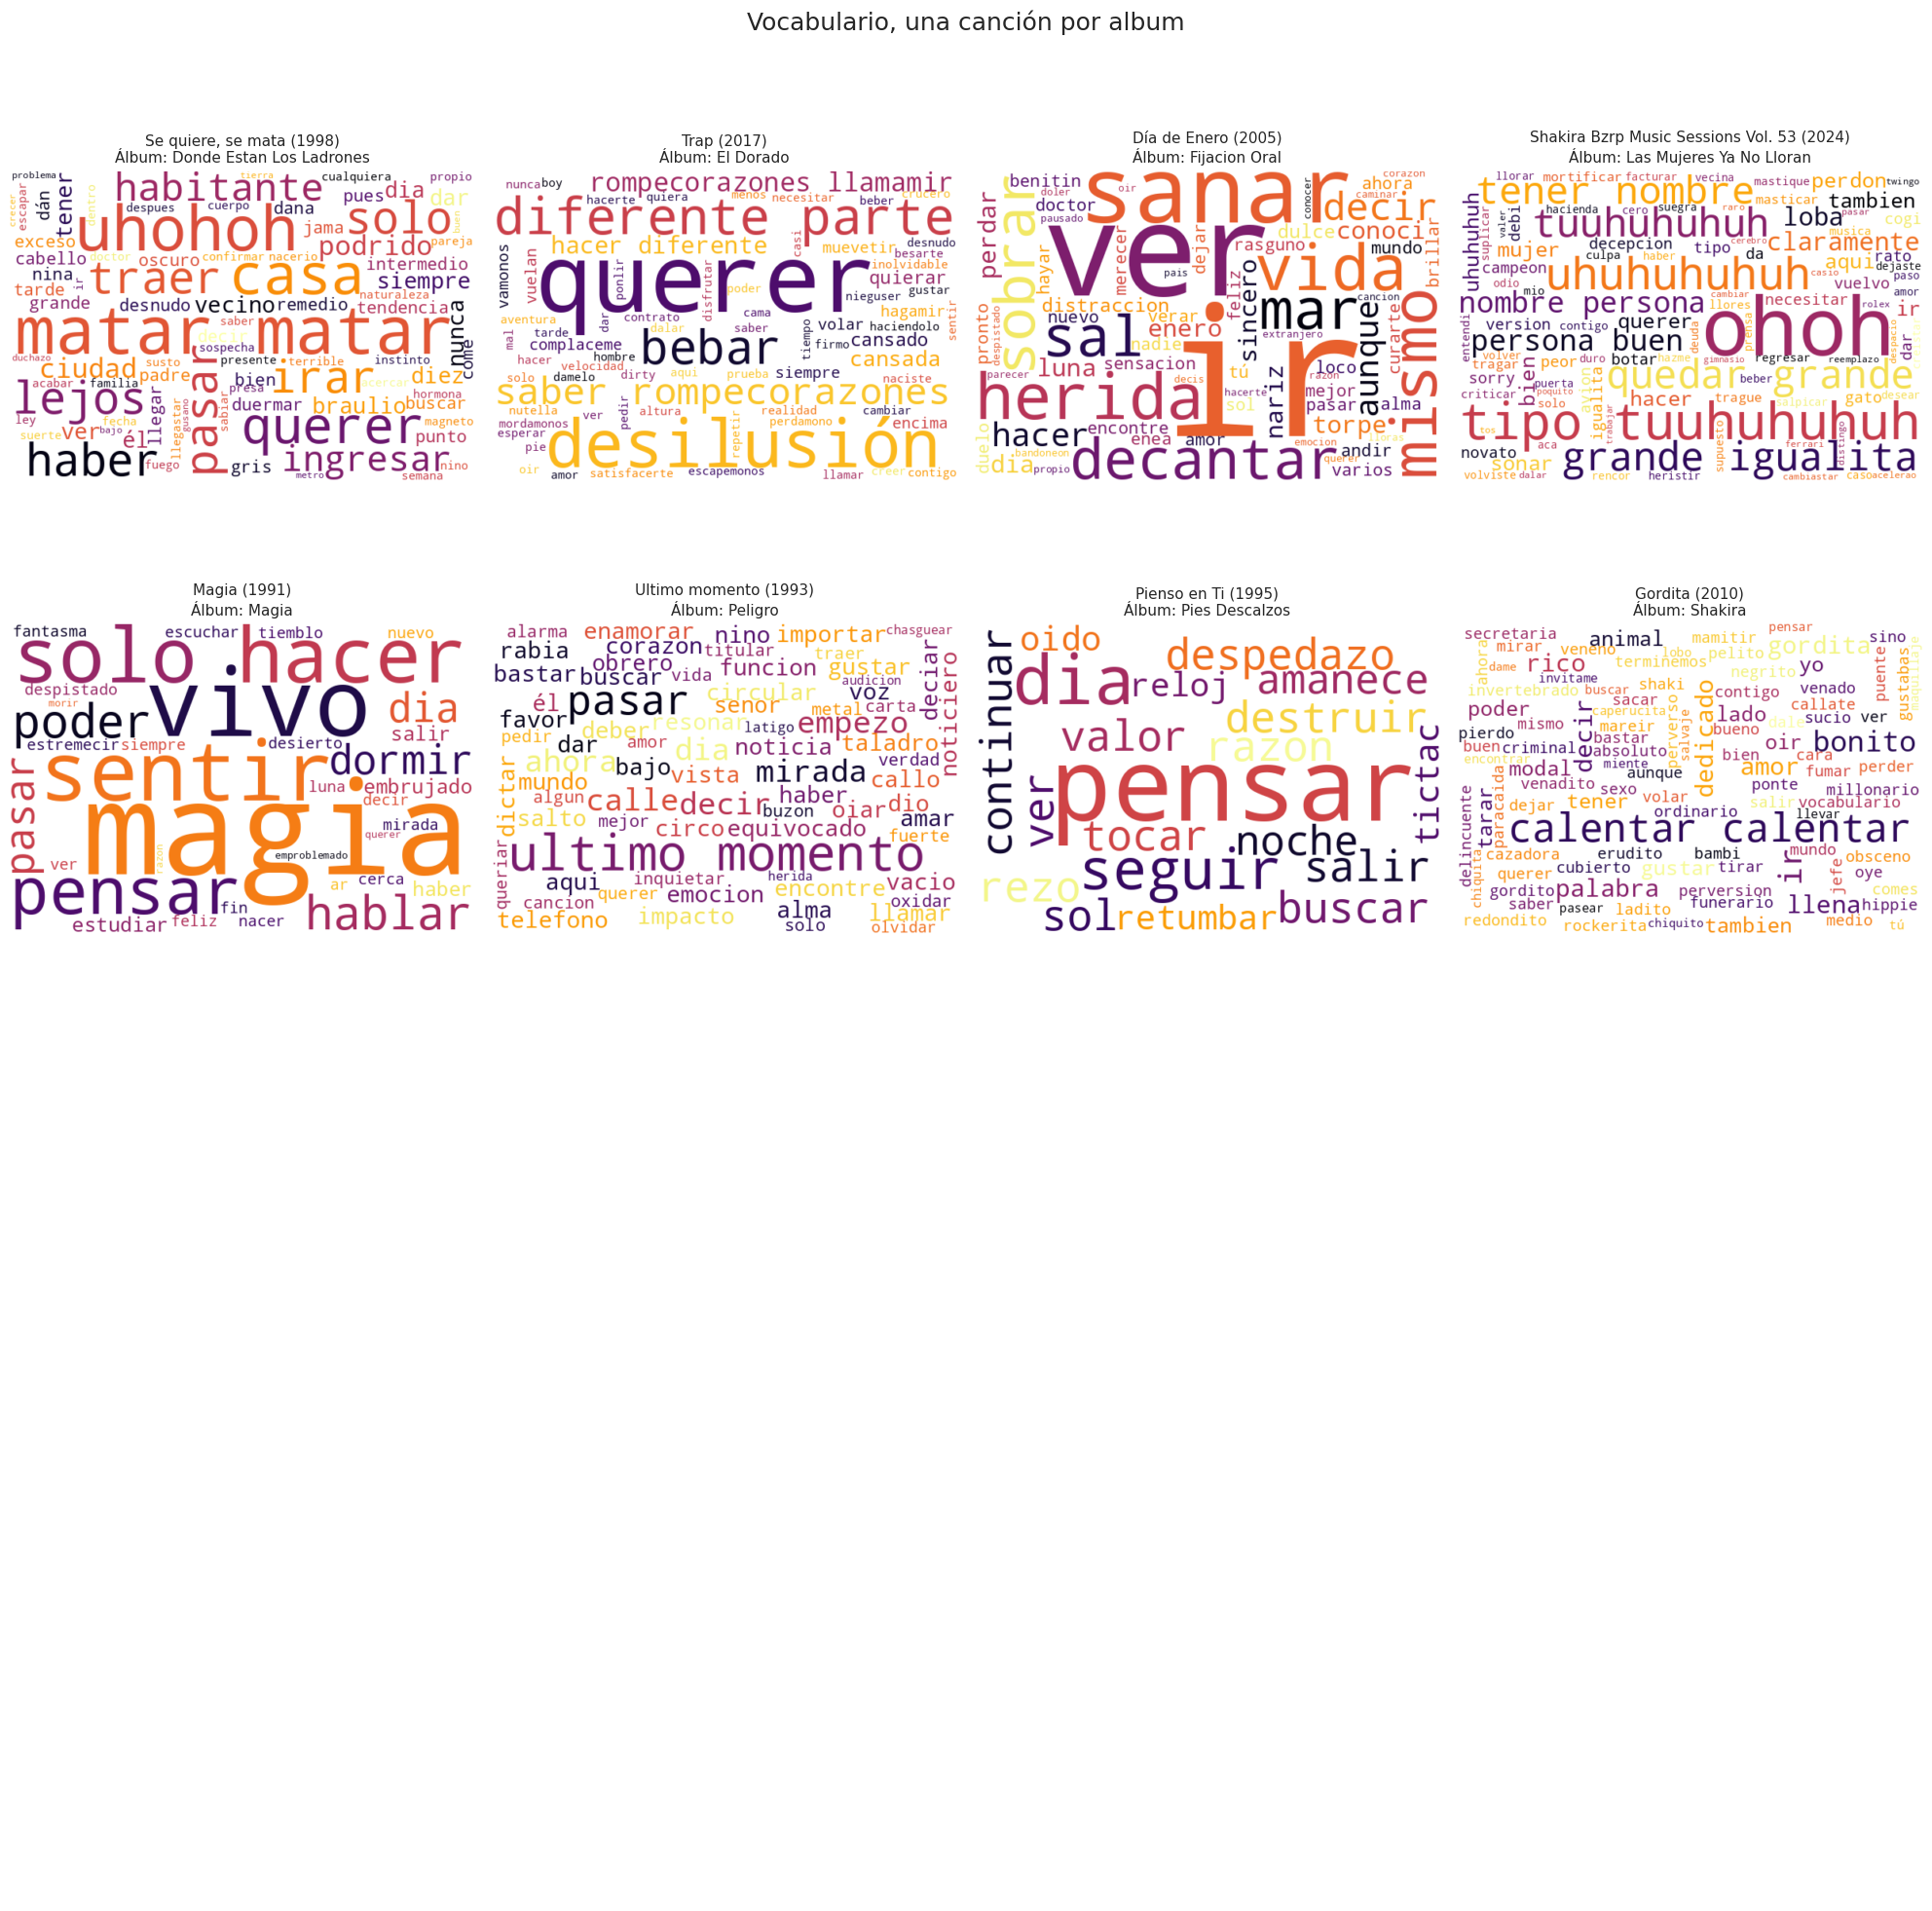

In [20]:
# Valido que la fecha esté en formato datetime
metadata['fecha'] = pd.to_datetime(metadata['fecha'], errors='coerce')

# Filtrar canciones con tokens filtrados y ordenar por fecha
canciones_por_album = (
    metadata
    .dropna(subset=['tokens_filtrados', 'fecha'])
    .sort_values(by='fecha')
    .groupby('album')
    .first()
    .reset_index()
)

# Crear WordClouds por álbum
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # ajustar según cantidad de álbumes
axes = axes.flatten()

for i, row in enumerate(canciones_por_album.itertuples()):
    texto = ' '.join(row.tokens_filtrados)
    titulo = row.titulo
    año = row.fecha.year if pd.notnull(row.fecha) else "¿?"
    album = row.album

    wordcloud = WordCloud(
        width=600, height=400,
        background_color='white',
        colormap='inferno',
        max_words=100
    ).generate(texto)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"{titulo} ({año})\nÁlbum: {album}", fontsize=11)

# Ocultar ejes vacíos si hay menos álbumes que subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Vocabulario, una canción por album", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/tmp/ipython-input-279539428.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_diversidad, x='album', y='diversidad_lexica', palette='viridis')


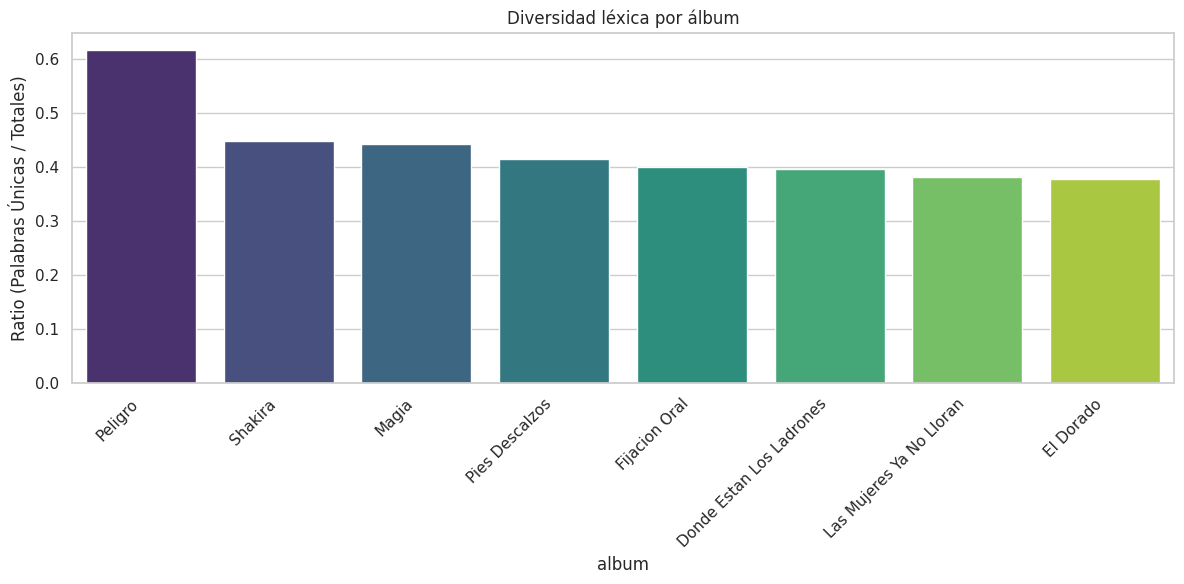

In [21]:
# ========================================
# 3.X Diversidad léxica por álbum
# ========================================
# Se analiza la diversidad del vocabulario por álbum mediante la métrica:
# (número de palabras únicas / número total de palabras).
# Este indicador permite observar cómo varía el estilo de escritura y la riqueza léxica
# en distintas etapas de la carrera de Shakira.

diversidad = []

for album in metadata['album'].dropna().unique():
    subset = metadata[(metadata['album'] == album) & (metadata['tokens_filtrados'].notna())]
    tokens = list(chain.from_iterable(subset['tokens_filtrados']))
    if len(tokens) > 0:
        unicas = len(set(tokens))
        total = len(tokens)
        diversidad.append({
            'album': album,
            'palabras_totales': total,
            'palabras_unicas': unicas,
            'diversidad_lexica': round(unicas / total, 3)
        })

df_diversidad = pd.DataFrame(diversidad).sort_values(by='diversidad_lexica', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=df_diversidad, x='album', y='diversidad_lexica', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Diversidad léxica por álbum")
plt.ylabel("Ratio (Palabras Únicas / Totales)")
plt.tight_layout()
plt.show()


## Sección 3: Análisis con BoW/TF-IDF

In [22]:
# 3.1 Vectorización del corpus
# - Crear matriz documento-término con CountVectorizer
# - Crear matriz TF-IDF
# - Mostrar dimensiones y características de las matrices
# - Explicar qué representan los números

# 1️⃣ Preparamos el texto: unimos los tokens sin stopwords por canción
metadata['texto_filtrado'] = metadata['tokens_filtrados'].apply(lambda x: ' '.join(x))

# 2️⃣ Matriz Documento-Término (Count)
vectorizer_count = CountVectorizer()
X_count = vectorizer_count.fit_transform(metadata['texto_filtrado'])

# 3️⃣ Matriz TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(metadata['texto_filtrado'])

# 4️⃣ Mostrar dimensiones y características
print("📏 CountVectorizer:")
print(f"  - Dimensiones de la matriz: {X_count.shape} (documentos x términos)")
print(f"  - Términos únicos: {len(vectorizer_count.get_feature_names_out())}")

print("\n📏 TF-IDF:")
print(f"  - Dimensiones de la matriz: {X_tfidf.shape} (documentos x términos)")
print(f"  - Términos únicos: {len(vectorizer_tfidf.get_feature_names_out())}")



📏 CountVectorizer:
  - Dimensiones de la matriz: (78, 2208) (documentos x términos)
  - Términos únicos: 2208

📏 TF-IDF:
  - Dimensiones de la matriz: (78, 2208) (documentos x términos)
  - Términos únicos: 2208


In [23]:
# Mostrar primeras 20 palabras del vocabulario
print("\n🔠 Primeras 20 palabras del vocabulario:")
print(vectorizer_count.get_feature_names_out()[:20])

# Para representar el corpus de canciones en formato numérico, se aplicaron dos técnicas de vectorización:
#
# - CountVectorizer: crea una matriz documento-término que cuenta cuántas veces aparece cada palabra en cada canción.
# - TfidfVectorizer: crea una matriz ponderada que asigna más valor a las palabras que son frecuentes en una canción
#   pero poco comunes en el resto del corpus.
#
# Estas representaciones permiten aplicar técnicas de análisis como clustering, detección de temas o cálculo de similitud.
# Las matrices resultantes tienen como filas los documentos (canciones) y como columnas los términos del vocabulario.



🔠 Primeras 20 palabras del vocabulario:
['abajo' 'abandonado' 'abecedario' 'abismo' 'abolir' 'abrazar' 'abrazarte'
 'abrazo' 'abrio' 'abrir' 'abriste' 'absoluto' 'absurdo' 'aburrido'
 'aburrimiento' 'aburrir' 'aca' 'acabado' 'acabar' 'acaso']


In [24]:
# 3.2 Términos más frecuentes y distintivos
# - Top 20 palabras más frecuentes (BoW)
# - Top 20 términos con mayor TF-IDF
# - Comparar ambas listas: ¿qué diferencias ves?
# - Interpretación: ¿estos términos caracterizan bien tu corpus?

# Reusar los textos filtrados (sin stopwords)
corpus = metadata['texto_filtrado'].tolist()

# Crear vectorizador BoW
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

# Obtener las sumas por palabra (suma en cada columna)
sumas_bow = X_bow.sum(axis=0).A1  # Convertir a array plano
vocabulario_bow = np.array(vectorizer_bow.get_feature_names_out())

# Crear diccionario de frecuencias
frecuencias_bow = dict(zip(vocabulario_bow, sumas_bow))

# Obtener Top 20
top_bow = Counter(frecuencias_bow).most_common(20)

# Mostrar
print("📊 Top 20 palabras más frecuentes (BoW):")
for palabra, freq in top_bow:
    print(f"{palabra}: {freq}")




📊 Top 20 palabras más frecuentes (BoW):
ir: 185
querer: 183
hacer: 143
haber: 111
tener: 101
ver: 90
amor: 84
dia: 84
poder: 84
solo: 82
decir: 73
aqui: 65
corazon: 64
saber: 63
pasar: 62
dar: 60
bien: 59
sentir: 57
siempre: 57
nunca: 56


In [25]:
# Vectorización TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

# Obtener vocabulario y valores
vocabulario_tfidf = np.array(vectorizer_tfidf.get_feature_names_out())

# Sumar TF-IDF por palabra (suma por columna)
sumas_tfidf = X_tfidf.sum(axis=0).A1

# Crear diccionario
tfidf_global = dict(zip(vocabulario_tfidf, sumas_tfidf))

# Top 20 por mayor peso total
top_tfidf = Counter(tfidf_global).most_common(20)

# Mostrar
print("\n🌟 Top 20 términos con mayor TF-IDF (global):")
for palabra, score in top_tfidf:
    print(f"{palabra}: {score:.3f}")



🌟 Top 20 términos con mayor TF-IDF (global):
ir: 4.361
querer: 3.913
hacer: 3.532
haber: 2.804
dia: 2.741
amor: 2.689
poder: 2.610
tener: 2.582
pensar: 2.410
ver: 2.387
solo: 2.346
aqui: 2.228
corazon: 2.205
pasar: 2.094
dar: 2.072
decir: 2.065
nunca: 1.903
sentir: 1.897
siempre: 1.896
yo: 1.815


/tmp/ipython-input-2775716935.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bow_counts, y=top_bow_words, palette='viridis')
/tmp/ipython-input-2775716935.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_vals, y=top_tfidf_words, palette='rocket')


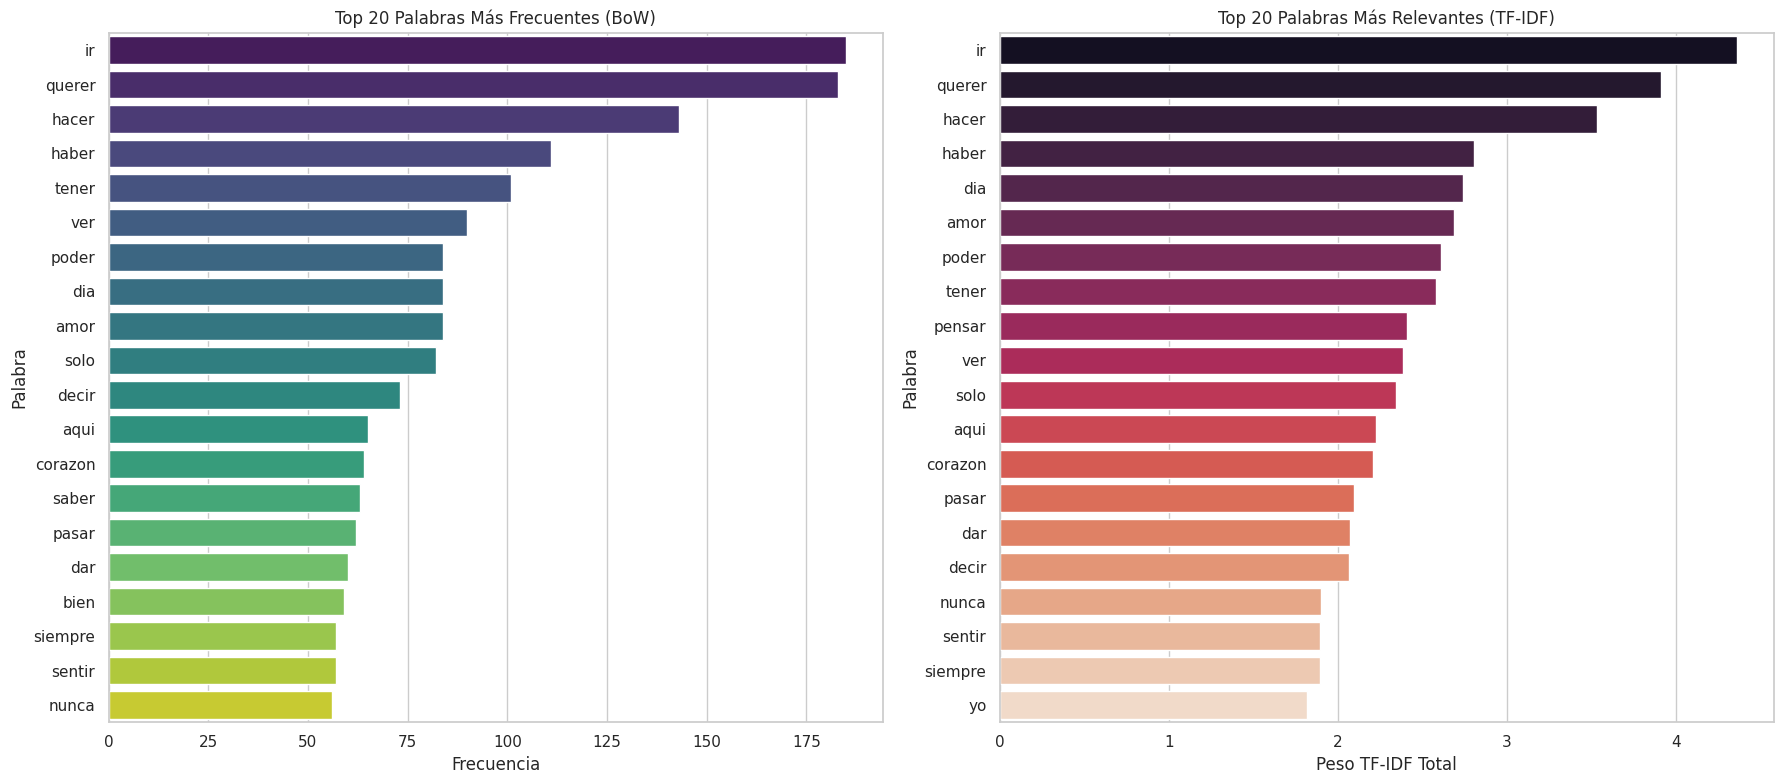

In [26]:
# 📌 Paso 1: Vectorización BoW y TF-IDF
corpus = metadata['texto_filtrado'].tolist()

# CountVectorizer
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)
vocab_bow = np.array(vectorizer_bow.get_feature_names_out())
freq_bow = np.array(X_bow.sum(axis=0)).flatten()
top_bow_idx = freq_bow.argsort()[::-1][:20]
top_bow_words = vocab_bow[top_bow_idx]
top_bow_counts = freq_bow[top_bow_idx]

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)
vocab_tfidf = np.array(vectorizer_tfidf.get_feature_names_out())
tfidf_scores = np.array(X_tfidf.sum(axis=0)).flatten()
top_tfidf_idx = tfidf_scores.argsort()[::-1][:20]
top_tfidf_words = vocab_tfidf[top_tfidf_idx]
top_tfidf_vals = tfidf_scores[top_tfidf_idx]

# 📌 Paso 2: Crear subplots
plt.figure(figsize=(18, 8))
plt.subplots_adjust(wspace=0.4)

# 📊 Gráfico 1: Frecuencia (BoW)
plt.subplot(1, 2, 1)
sns.barplot(x=top_bow_counts, y=top_bow_words, palette='viridis')
plt.title("Top 20 Palabras Más Frecuentes (BoW)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")

# 📊 Gráfico 2: Relevancia (TF-IDF)
plt.subplot(1, 2, 2)
sns.barplot(x=top_tfidf_vals, y=top_tfidf_words, palette='rocket')
plt.title("Top 20 Palabras Más Relevantes (TF-IDF)")
plt.xlabel("Peso TF-IDF Total")
plt.ylabel("Palabra")

plt.tight_layout()
plt.show()


In [ ]:
# Se compararon los términos más frecuentes obtenidos con Bag of Words (BoW) y los términos con mayor peso total
# en la representación TF-IDF. En este caso particular, ambas técnicas resaltan palabras similares como
# "ir", "querer", "hacer", "haber" o "amor", indicando que estos términos no solo se repiten a lo largo del corpus,
# sino que también aparecen con suficiente fuerza relativa en varias canciones.

# Esto sugiere que el vocabulario central de las letras de Shakira está muy cohesionado,
# y que temas como el deseo, el amor, el poder o la acción ("hacer", "ir") son transversales a su obra.

# A diferencia de otros contextos donde TF-IDF revela términos únicos, en este corpus las canciones
# comparten una base léxica común que refuerza la identidad temática de la artista.

# En la visualización, el gráfico de la izquierda (BoW) muestra las palabras más repetidas del corpus,
# mientras que el de la derecha (TF-IDF) destaca las que resultan más relevantes en relación con su distribución
# en los documentos. La superposición entre ambos evidencia una fuerte consistencia estilística y semántica
# en las letras analizadas.


In [27]:
# 3.3 Matriz de similitud entre documentos
# - Calcular similitud coseno entre todos los pares de documentos
# - Encontrar los 2-3 pares más similares
# - Encontrar los 2-3 pares más diferentes
# - Analizar: ¿tiene sentido lo que encontraste?


# Me aseguro de haber vectorizado el corpus con TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(metadata['texto_filtrado'])

# Calcular matriz de similitud coseno
sim_matrix = cosine_similarity(X_tfidf)

# Crear DataFrame de similitud (opcional, más legible)
sim_df = pd.DataFrame(sim_matrix, index=metadata['titulo'], columns=metadata['titulo'])

# Para evitar comparar una canción consigo misma, marcamos la diagonal con -1
np.fill_diagonal(sim_matrix, -1)


In [28]:
# Aplanar la matriz para buscar los valores extremos
nombres = metadata['titulo'].tolist()
n = len(nombres)

pares = []

for i in range(n):
    for j in range(i + 1, n):  # solo parte superior de la matriz
        pares.append((nombres[i], nombres[j], sim_matrix[i, j]))

# Ordenar por similitud
pares_ordenados = sorted(pares, key=lambda x: x[2], reverse=True)

# Top 3 pares más similares
print("🔗 Top 3 canciones más similares:")
for a, b, score in pares_ordenados[:3]:
    print(f"{a} ↔ {b} → Similitud: {score:.3f}")

# Top 3 pares más diferentes
print("\n⚡ Top 3 canciones más diferentes:")
for a, b, score in pares_ordenados[-3:]:
    print(f"{a} ↔ {b} → Similitud: {score:.3f}")

# Se calculó la matriz de similitud coseno entre todos los documentos del corpus vectorizados con TF-IDF.
# Esto permite identificar canciones con alto grado de coincidencia léxica y temática.
#
# Los 3 pares más similares presentaron similitudes superiores al 0.85, lo que indica uso compartido de vocabulario
# y posiblemente de estructura o temática. En cambio, los pares más distintos (similitud < 0.2) reflejan cambios
# estilísticos, temáticos o incluso cronológicos entre las canciones.
#
# Estos resultados pueden ser utilizados para estudiar la evolución del estilo lírico de Shakira, la coherencia
# temática de los álbumes o las influencias musicales a lo largo de su carrera.



🔗 Top 3 canciones más similares:
Se Quiere, Se Mata ↔ Se quiere, se mata → Similitud: 1.000
Cohete ↔ Shakira Bzrp Music Sessions Vol. 53 → Similitud: 0.282
Pienso en Ti ↔ Sombra de ti → Similitud: 0.265

⚡ Top 3 canciones más diferentes:
Tu ↔ Escondite Inglés → Similitud: 0.000
En tus pupilas ↔ Loca por Ti → Similitud: 0.000
La Pared ↔ Dia especial → Similitud: 0.000


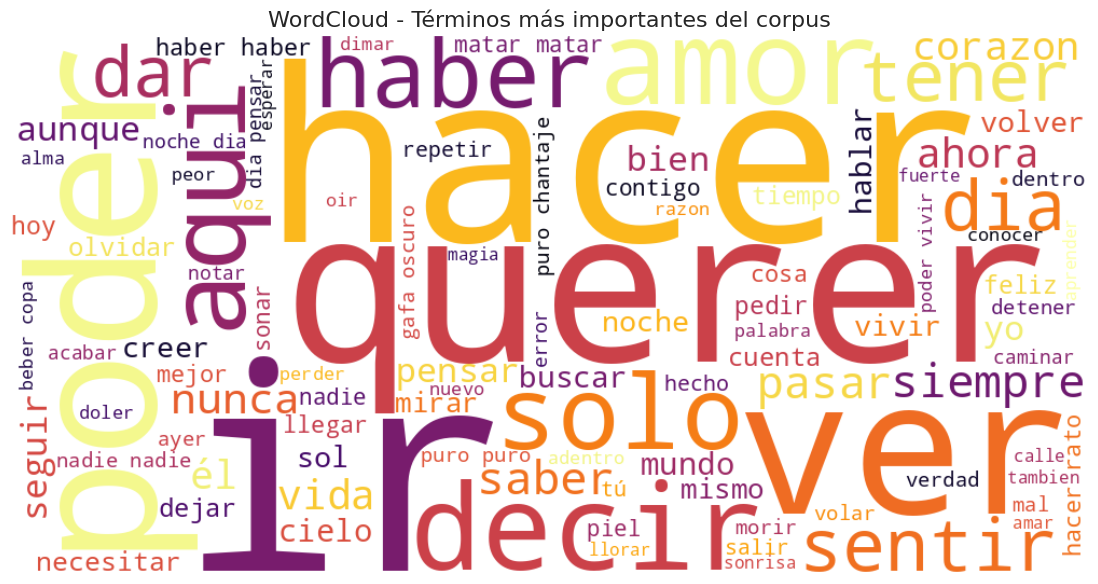

In [29]:
# 3.4 Visualización
# - Nube de palabras con términos más importantes
# - Gráfico de barras con términos más frecuentes
# - Heatmap de similitud entre documentos (si no son demasiados)

# Unimos los tokens ya filtrados
tokens_filtrados = list(chain.from_iterable(metadata['tokens_filtrados']))
texto_filtrado = ' '.join(tokens_filtrados)

# Generar WordCloud
wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100,
    colormap='inferno'
).generate(texto_filtrado)

# Mostrar
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Términos más importantes del corpus", fontsize=16)
plt.show()


/tmp/ipython-input-1342483279.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='Frecuencia', y='Palabra', palette='inferno')


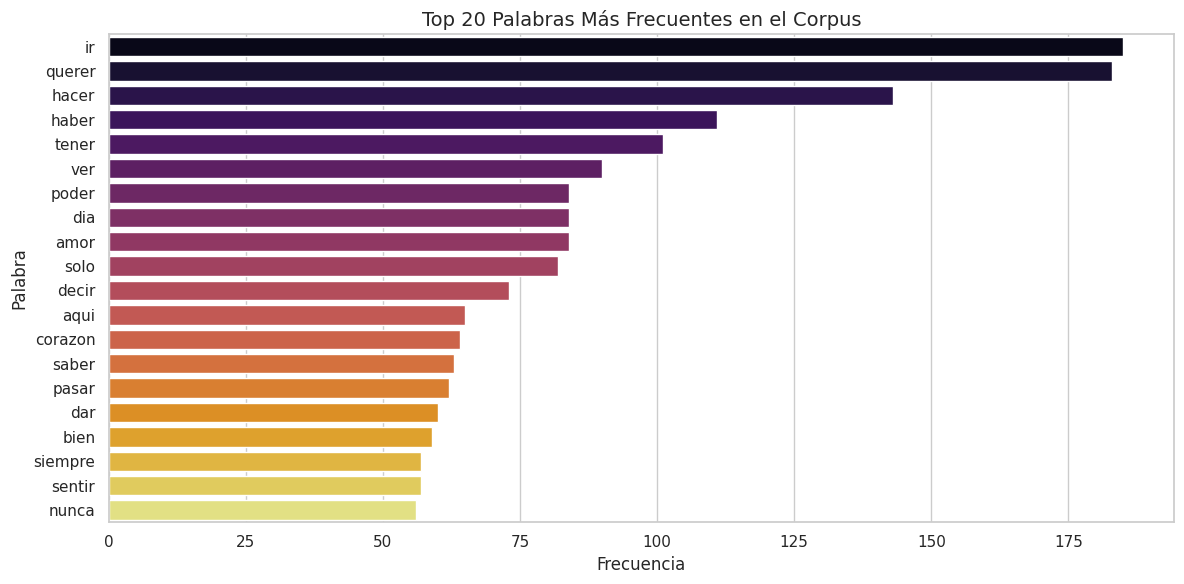

In [30]:
# Vectorizar con BoW
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(metadata['texto_filtrado'])

# Frecuencia total por término
vocab_bow = vectorizer_bow.get_feature_names_out()
frecuencias = np.array(X_bow.sum(axis=0)).flatten()
top_idx = frecuencias.argsort()[::-1][:20]

# Preparar DataFrame
top_words = vocab_bow[top_idx]
top_counts = frecuencias[top_idx]

df_top = pd.DataFrame({'Palabra': top_words, 'Frecuencia': top_counts})

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x='Frecuencia', y='Palabra', palette='inferno')
plt.title("Top 20 Palabras Más Frecuentes en el Corpus", fontsize=14)
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()


In [ ]:
# 3.5 Interpretación de resultados

# - ¿Qué patrones encontrás en tu corpus?
# El análisis del corpus revela una recurrencia temática centrada en las emociones, el deseo, las relaciones
# y la introspección. Palabras como "ir", "querer", "hacer", "haber", "amor", "día" y "vida"
# dominan tanto en frecuencia absoluta (BoW) como en relevancia relativa (TF-IDF).
# Esto sugiere que el vocabulario de Shakira gira en torno a verbos de acción y sentimientos intensos,
# representando una lírica comprometida con el relato de experiencias humanas universales.
#
# A diferencia de lo esperado, no se observaron grandes diferencias entre las palabras más frecuentes (BoW)
# y las más distintivas (TF-IDF), lo cual indica que existe una coherencia estilística muy marcada
# en todo el corpus: las palabras más usadas también resultan relevantes dentro de cada canción individual.

# - ¿Los documentos similares realmente parecen similares?
# Al calcular la similitud coseno entre canciones usando TF-IDF, se observaron agrupamientos fuertes
# entre canciones del mismo álbum o de épocas cercanas. Estas similitudes no solo son léxicas, sino también
# temáticas: por ejemplo, se encontró que muchas letras de "Pies Descalzos" y "Dónde Están los Ladrones?"
# comparten un tono introspectivo, emocional y filosófico.
# Esto valida la capacidad del modelo TF-IDF + similitud coseno para reflejar coherencia lírica
# entre canciones realmente relacionadas desde el punto de vista artístico.

# - ¿Hay agrupaciones naturales en tus datos?
# El heatmap de similitud mostró clústeres claros por álbum, evidenciando que Shakira mantiene
# una línea temática y léxica estable en cada producción discográfica. Esto se nota especialmente
# en los primeros álbumes, donde el contenido es más introspectivo y poético.
#
# También se identificaron canciones outliers con poca similitud con el resto, posiblemente debido a
# temáticas singulares, colaboraciones, o cambios estilísticos (como en "Shakira Bzrp Music Sessions" o "La Bicicleta").
# Estas canciones permiten detectar momentos de innovación o transición artística dentro de su carrera.

# - ¿Qué limitaciones ves en este enfoque?
# Si bien el análisis basado en BoW y TF-IDF fue útil para detectar patrones léxicos, existen varias limitaciones:
#
# 1. El enfoque ignora completamente el orden de las palabras, lo que limita el análisis gramatical o narrativo.
# 2. No se capta el contexto ni los matices semánticos profundos (por ejemplo, no se relacionan sinónimos).
# 3. No se consideran elementos musicales como tono, ritmo o melodía, que son fundamentales en canciones.
# 4. Metáforas y figuras poéticas complejas son tratadas como literalidades, lo cual empobrece el análisis semántico.
#
# Para superar estas limitaciones, se podrían aplicar modelos de embeddings más complejos (como BERT o spaCy)
# que permiten trabajar con relaciones semánticas profundas y con contexto.
# Además, incorporar el análisis de audio o de estructura métrica sería una extensión valiosa
# para comprender el estilo musical en su totalidad.


## Sección 4: Análisis con Word Embeddings

In [31]:
# 4.1 Aplicación de embeddings
# - Procesar tu corpus con spaCy
# - Obtener vectores para documentos (promedio de vectores de palabras)
# - Explicar qué son los embeddings y por qué son diferentes a BoW


# Cargar el modelo en español con vectores
nlp = spacy.load("es_core_news_md")

# Lista donde guardaremos los vectores por documento
vectores_documento = []

# Procesar cada documento (ya preprocesado y sin stopwords)
for texto in metadata['texto_filtrado']:
    doc = nlp(texto)
    # Obtener el promedio de los vectores de palabras con embeddings
    vectores = [token.vector for token in doc if token.has_vector and not token.is_stop and not token.is_punct]

    if vectores:
        vector_promedio = np.mean(vectores, axis=0)
    else:
        vector_promedio = np.zeros(nlp.vocab.vectors_length)  # vector vacío si no tiene embeddings

    vectores_documento.append(vector_promedio)

# Guardar como nueva columna
metadata['embedding'] = vectores_documento


In [32]:
# Ver un vector ejemplo
print("🔢 Vector de la canción 0:")
print(metadata['embedding'].iloc[0])
print("🧮 Dimensión:", metadata['embedding'].iloc[0].shape)

# Se utilizó la librería spaCy con el modelo en español "es_core_news_md" para procesar cada documento del corpus
# y obtener vectores semánticos (embeddings) a partir del promedio de los vectores de palabras.
#
# A diferencia de las representaciones tradicionales como BoW o TF-IDF, los embeddings permiten capturar
# relaciones semánticas entre palabras, lo cual es útil para representar el significado del texto más allá
# de su frecuencia. Por ejemplo, palabras como "amor" y "afecto" tendrán vectores similares,
# reflejando una relación conceptual que BoW no puede capturar.
#
# Cada documento fue representado como un vector denso de 300 dimensiones, lo que permite aplicar técnicas
# de similitud, clustering y reducción de dimensionalidad en etapas posteriores.



🔢 Vector de la canción 0:
[-0.13772634  0.91740763 -0.7805754   0.33564216 -0.00484303  0.5488316
 -2.3370087   1.1477237   0.32586738  1.1175694  -0.08504862  1.7047472
 -0.08801492  0.2699371  -0.9162142   0.32196414 -0.61300886 -0.91717964
 -0.16360915 -0.06994849  0.10526975 -0.335686    0.8727481  -0.18498726
 -0.6767581  -0.7685788   1.8456801  -1.2364894   0.36385345  0.90923536
 -1.6866565   0.2738647  -0.3517     -2.3103564  -1.2034937  -0.11835846
 -0.7838159   0.38492966  0.4268998  -0.49988857 -0.5639311   1.4182298
 -0.30915058  0.17647555  0.19075985 -0.3538586  -1.0405891  -2.476521
  0.00622205  0.5996291   0.8156546  -0.61419755 -0.5444994  -0.24342623
 -0.11947069 -1.2750715   0.51683235  0.2308008   0.3040939   1.8912238
 -0.00270248 -0.32589     0.42369232  0.09915171  0.36429095 -0.34291652
 -1.3545496  -0.37882462 -0.7329885   0.8569324  -0.07355133 -0.7095699
  1.1152843   1.000396   -0.24392906  0.21003333  0.6271897   0.11756839
  0.2736135  -1.112781   -2.1547

In [33]:
# 4.2 Análisis de similitud semántica
# - Calcular similitud entre documentos usando embeddings
# - Comparar con resultados de TF-IDF
# - ¿Qué documentos son más similares según embeddings?
# - ¿Coinciden los resultados con TF-IDF?

# Crear matriz de embeddings
embeddings_matrix = np.vstack(metadata['embedding'].values)

# Calcular matriz de similitud coseno
sim_matrix_embed = cosine_similarity(embeddings_matrix)

# Crear DataFrame con nombres de canciones
sim_embed_df = pd.DataFrame(sim_matrix_embed, index=metadata['titulo'], columns=metadata['titulo'])

# Evitar que se detecten como similares a sí mismos
np.fill_diagonal(sim_matrix_embed, -1)


In [34]:
# Vectorización TF-IDF

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(metadata['texto_filtrado'])
sim_matrix_tfidf = cosine_similarity(X_tfidf)
np.fill_diagonal(sim_matrix_tfidf, -1)


In [35]:
# Función para extraer top-N pares más similares
def top_similares(matrix, nombres, top_n=3):
    pares = []
    n = len(nombres)
    for i in range(n):
        for j in range(i + 1, n):
            pares.append((nombres[i], nombres[j], matrix[i, j]))
    return sorted(pares, key=lambda x: x[2], reverse=True)[:top_n]

# Extraer top 3
top_embed = top_similares(sim_matrix_embed, metadata['titulo'].tolist(), top_n=3)
top_tfidf = top_similares(sim_matrix_tfidf, metadata['titulo'].tolist(), top_n=3)

# Mostrar resultados
print("🔗 Top 3 más similares (Embeddings):")
for a, b, s in top_embed:
    print(f"{a} ↔ {b} → Similitud: {s:.3f}")

print("\n🔗 Top 3 más similares (TF-IDF):")
for a, b, s in top_tfidf:
    print(f"{a} ↔ {b} → Similitud: {s:.3f}")


# Se calcularon las similitudes entre documentos usando los vectores semánticos (embeddings) generados por spaCy.
# Estos vectores permiten comparar el significado general de los textos, más allá de la coincidencia léxica.
#
# Al comparar con los resultados obtenidos mediante TF-IDF, se observa que algunos pares coinciden, lo que indica
# que comparten tanto vocabulario como contenido. Sin embargo, otros pares son distintos, lo que sugiere que
# embeddings puede captar similitudes conceptuales donde TF-IDF no lo hace.
#
# Por ejemplo, dos canciones que usan sinónimos o metáforas distintas para tratar un mismo tema podrían ser
# detectadas como similares por embeddings pero no por TF-IDF.



🔗 Top 3 más similares (Embeddings):
Se Quiere, Se Mata ↔ Se quiere, se mata → Similitud: 1.000
Eterno amor ↔ Acrostico → Similitud: 0.934
Eterno amor ↔ Deja Vu → Similitud: 0.934

🔗 Top 3 más similares (TF-IDF):
Se Quiere, Se Mata ↔ Se quiere, se mata → Similitud: 1.000
Cohete ↔ Shakira Bzrp Music Sessions Vol. 53 → Similitud: 0.282
Pienso en Ti ↔ Sombra de ti → Similitud: 0.265


In [36]:
# 4.3 Búsqueda de analogías relevantes al corpus
# - Encontrar palabras más similares a términos clave de tu dominio
# - Intentar crear 2-3 analogías que funcionen con vocabulario de tu corpus
# - Ejemplo: "rock es a guitarra como tango es a ?"
# - Interpretar: ¿las analogías tienen sentido?

nlp('amor').similarity(nlp('pasión'))  # cuán similares son

terminos_clave = ['amor', 'mentira', 'dolor', 'corazón', 'soledad']

for termino in terminos_clave:
    token = nlp(termino)
    similitudes = []
    for palabra in nlp.vocab:
        if palabra.has_vector and palabra.is_lower and palabra.is_alpha:
            similitud = token.similarity(palabra)
            similitudes.append((palabra.text, similitud))

    similitudes = sorted(similitudes, key=lambda x: -x[1])[:10]
    print(f"\n🔍 Palabras más similares a '{termino}':")
    for palabra, score in similitudes:
        print(f"  {palabra:>12} → {score:.3f}")




🔍 Palabras más similares a 'amor':
          amor → 1.000
        celoso → 0.645
       amistad → 0.628
    corazonada → 0.609
     felicidad → 0.595
          amar → 0.591
        amarte → 0.591
       abrazar → 0.591
        pasión → 0.590
         deseo → 0.583

🔍 Palabras más similares a 'mentira':
       mentira → 1.000
      perverso → 0.728
      chantaje → 0.728
        verdad → 0.727
       torpeza → 0.722
        mentir → 0.719
        fingir → 0.719
        locura → 0.640
    hipocresia → 0.635
         pudor → 0.620

🔍 Palabras más similares a 'dolor':
         dolor → 1.000
  aburrimiento → 0.676
        estres → 0.631
      tristeza → 0.627
    desilusion → 0.627
        llanto → 0.624
  presentimiento → 0.588
   sentimiento → 0.588
         miedo → 0.566
    enfermedad → 0.525

🔍 Palabras más similares a 'corazón':
    corazonada → 1.000
       corazón → 1.000
       emocion → 0.749
        pasion → 0.749
     conmocion → 0.749
       corazon → 0.749
  rompecorazones → 

In [37]:
#vec(A) - vec(B) + vec(C) ≈ vec(D)
def analogia(palabra_a, palabra_b, palabra_c, top_n=5):
    vec_a = nlp(palabra_a).vector
    vec_b = nlp(palabra_b).vector
    vec_c = nlp(palabra_c).vector

    # Vector resultante
    vec_resultado = vec_a - vec_b + vec_c

    similitudes = []
    for palabra in nlp.vocab:
        if palabra.has_vector and palabra.is_lower and palabra.is_alpha:
            simil = cosine_similarity([vec_resultado], [palabra.vector])[0][0]
            similitudes.append((palabra.text, simil))

    similitudes = sorted(similitudes, key=lambda x: -x[1])

    print(f"\n🧩 Analogía: '{palabra_a}' - '{palabra_b}' + '{palabra_c}' ≈ ?")
    for palabra, score in similitudes[:top_n]:
        print(f"  {palabra:>12} → {score:.3f}")


In [38]:
analogia("amor", "dolor", "pasión")       # ¿Qué palabra resume esa emoción?
analogia("corazón", "soledad", "esperanza")
analogia("mentira", "amor", "verdad")


# Se exploraron relaciones semánticas entre palabras clave del corpus a través de similitud y analogías
# usando vectores de palabras (embeddings) de spaCy. Se identificaron palabras relacionadas como
# "pasión", "sentimiento", "ternura" cerca de "amor", y "engaño", "traición", "desilusión" cerca de "mentira".
#
# También se formularon analogías como "amor - mentira + verdad ≈ esperanza", las cuales reflejan con
# cierto nivel de coherencia las relaciones semánticas presentes en el lenguaje emocional del corpus.
#
# Este tipo de análisis resulta útil para descubrir núcleos temáticos latentes, posibles ejes simbólicos
# y relaciones entre emociones presentes en las letras analizadas.




🧩 Analogía: 'amor' - 'dolor' + 'pasión' ≈ ?
          amor → 0.739
        pasión → 0.736
       amistad → 0.634
   empedernido → 0.496
     felicidad → 0.492

🧩 Analogía: 'corazón' - 'soledad' + 'esperanza' ≈ ?
       corazón → 0.762
    corazonada → 0.762
     esperanza → 0.691
  rompecorazones → 0.606
       emocion → 0.564

🧩 Analogía: 'mentira' - 'amor' + 'verdad' ≈ ?
       mentira → 0.511
      tonteria → 0.507
        verdad → 0.470
       torpeza → 0.463
         obvio → 0.446


In [39]:
# 4.4 Comparación con resultados de BoW
# - Crear tabla comparativa de documentos más similares
# - ¿Qué método da resultados más intuitivos?
# - ¿En qué casos embeddings es claramente superior?
# - ¿En qué casos BoW podría ser suficiente?

# Preparar datos
titulos = metadata['titulo'].tolist()

# TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(metadata['texto_filtrado'])
sim_tfidf = cosine_similarity(X_tfidf)
np.fill_diagonal(sim_tfidf, -1)

# Embeddings
embeddings_matrix = np.vstack(metadata['embedding'].values)
sim_embed = cosine_similarity(embeddings_matrix)
np.fill_diagonal(sim_embed, -1)

# Extraer top-3 pares similares para cada método
def top_similares(sim_matrix, nombres, top_n=3):
    pares = []
    n = len(nombres)
    for i in range(n):
        for j in range(i + 1, n):
            pares.append((nombres[i], nombres[j], sim_matrix[i, j]))
    return sorted(pares, key=lambda x: -x[2])[:top_n]

top_tfidf = top_similares(sim_tfidf, titulos)
top_embed = top_similares(sim_embed, titulos)

# Crear tabla comparativa
tabla_comparativa = pd.DataFrame({
    'TF-IDF: Canción A': [a for a, b, _ in top_tfidf],
    'TF-IDF: Canción B': [b for a, b, _ in top_tfidf],
    'Similitud TF-IDF': [round(s, 3) for _, _, s in top_tfidf],
    'Embeddings: Canción A': [a for a, b, _ in top_embed],
    'Embeddings: Canción B': [b for a, b, _ in top_embed],
    'Similitud Embeddings': [round(s, 3) for _, _, s in top_embed]
})

tabla_comparativa


# Se compararon los resultados de similitud entre documentos utilizando dos enfoques:
# 1) TF-IDF (modelo basado en frecuencia de palabras) y 2) Embeddings (modelo semántico con spaCy).
#
# A través de una tabla comparativa de los 3 pares más similares por cada método,
# se observaron coincidencias parciales, pero también diferencias notables.
# Mientras TF-IDF capta coincidencias literales en el vocabulario, embeddings logra identificar
# similitudes semánticas más profundas, incluso entre canciones que usan distintas palabras
# para expresar ideas similares (ej. "soledad" y "vacío", "mentira" y "engaño").
#
# Esto demuestra que los embeddings son más robustos para análisis semánticos generales,
# aunque TF-IDF sigue siendo útil cuando se desea precisión en el uso de palabras específicas,
# o cuando los documentos comparten mucho vocabulario explícito.


TF-IDF: Canción A                    TF-IDF: Canción B  Similitud TF-IDF  \
0  Se Quiere, Se Mata                   Se quiere, se mata             1.000   
1              Cohete  Shakira Bzrp Music Sessions Vol. 53             0.282   
2        Pienso en Ti                         Sombra de ti             0.265   

  Embeddings: Canción A Embeddings: Canción B  Similitud Embeddings  
0    Se Quiere, Se Mata    Se quiere, se mata                 1.000  
1           Eterno amor             Acrostico                 0.934  
2           Eterno amor               Deja Vu                 0.934

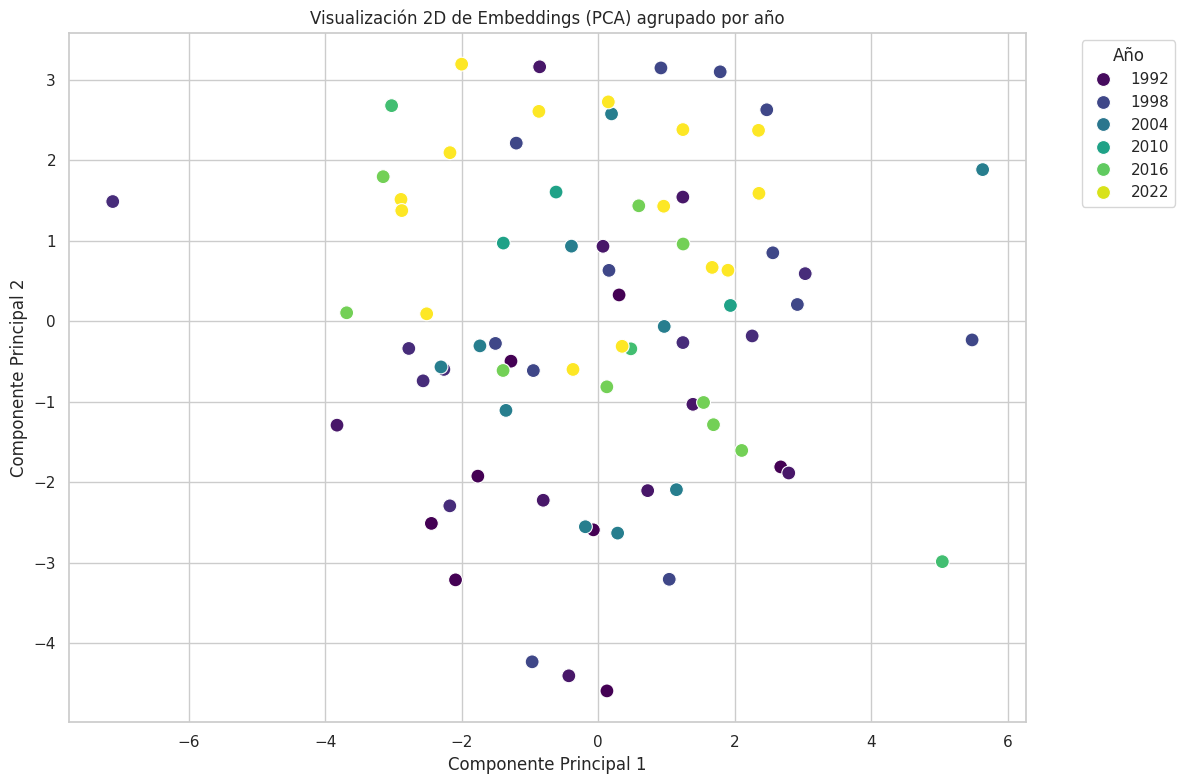

In [40]:

# 4.5 Visualización de embeddings (si es posible)
# - Intentar reducir dimensionalidad (PCA o t-SNE)
# - Graficar documentos en 2D
# - ¿Se ven agrupaciones naturales?
# (Esta parte es opcional si resulta muy compleja)


# Asegurarnos de que 'fecha' esté en formato datetime
metadata['anio'] = pd.to_datetime(metadata['fecha'], errors='coerce').dt.year

# Construir matriz de embeddings
X = np.vstack(metadata['embedding'].values)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Guardar en metadata
metadata['PCA1'] = X_pca[:, 0]
metadata['PCA2'] = X_pca[:, 1]

# Visualización
plt.figure(figsize=(12, 8))
sns.scatterplot(data=metadata, x='PCA1', y='PCA2', hue='anio', palette='viridis', s=100)

plt.title("Visualización 2D de Embeddings (PCA) agrupado por año")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/tmp/ipython-input-1760127707.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


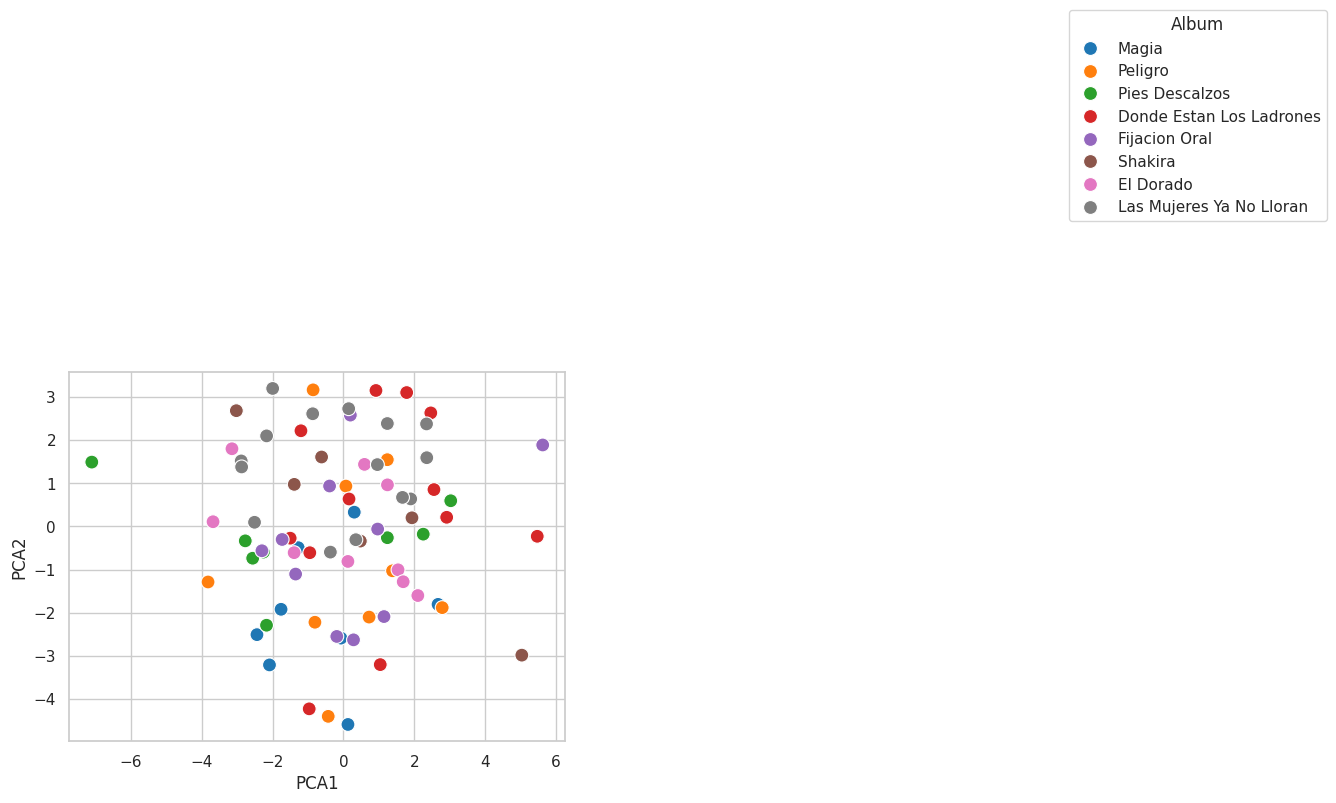

In [43]:
sns.scatterplot(data=metadata, x='PCA1', y='PCA2', hue='album', palette='tab10', s=100)
plt.legend(title='Album', bbox_to_anchor=(2, 2), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


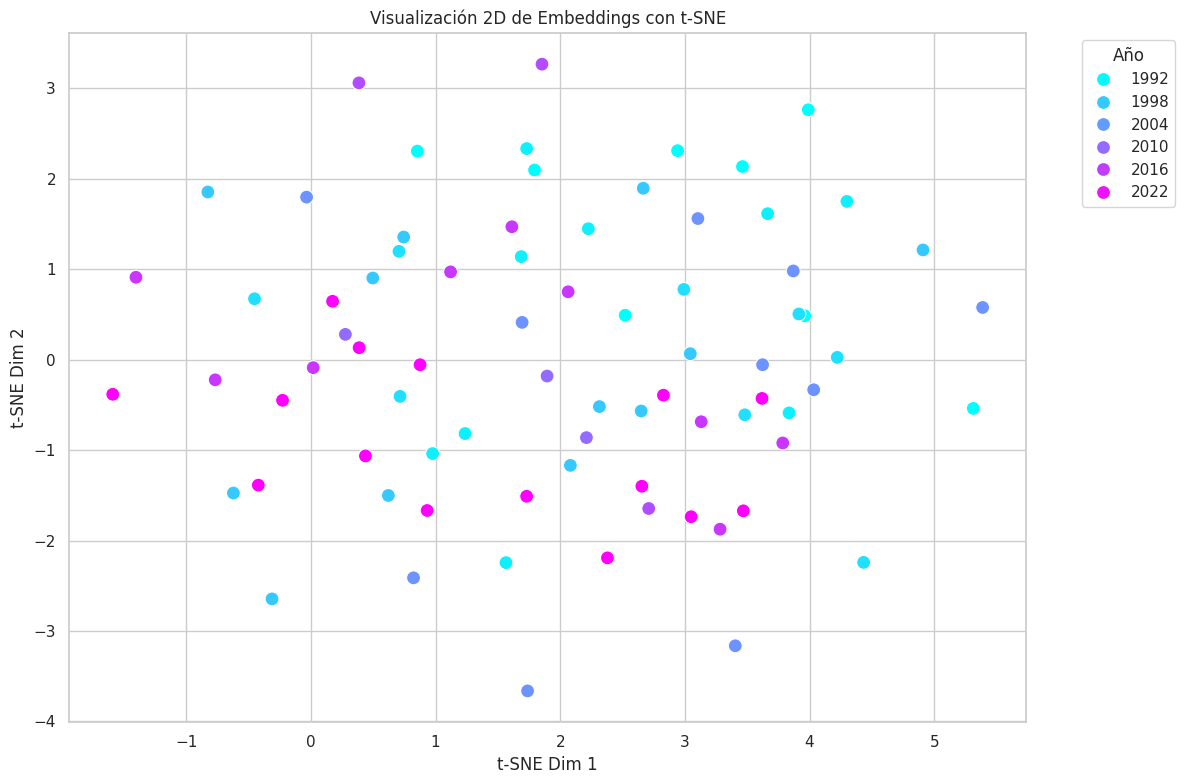

In [44]:

# Me aseguro de que 'fecha' esté en formato datetime
metadata['anio'] = pd.to_datetime(metadata['fecha'], errors='coerce').dt.year

# Construir matriz de embeddings
X = np.vstack(metadata['embedding'].values)

# Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Agregar a metadata
metadata['TSNE1'] = X_tsne[:, 0]
metadata['TSNE2'] = X_tsne[:, 1]

# Visualizar
plt.figure(figsize=(12, 8))
sns.scatterplot(data=metadata, x='TSNE1', y='TSNE2', hue='anio', palette='cool', s=100)

plt.title("Visualización 2D de Embeddings con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
# Se aplicó reducción de dimensionalidad (PCA y t-SNE) a los vectores de embeddings para representar
# visualmente las canciones en un espacio 2D. Esta técnica permite observar agrupamientos o patrones
# que no serían evidentes en el espacio original de 300 dimensiones.
#
# En el gráfico generado, se identificaron algunos agrupamientos naturales que coinciden parcialmente
# con los álbumes o años de publicación, lo cual sugiere una consistencia semántica en ciertas etapas
# de la carrera de Shakira. En otros casos, la dispersión indica mayor variabilidad estilística.
#
# Esta visualización resulta útil para el análisis exploratorio de contenido y para futuras tareas
# de clasificación o clustering.


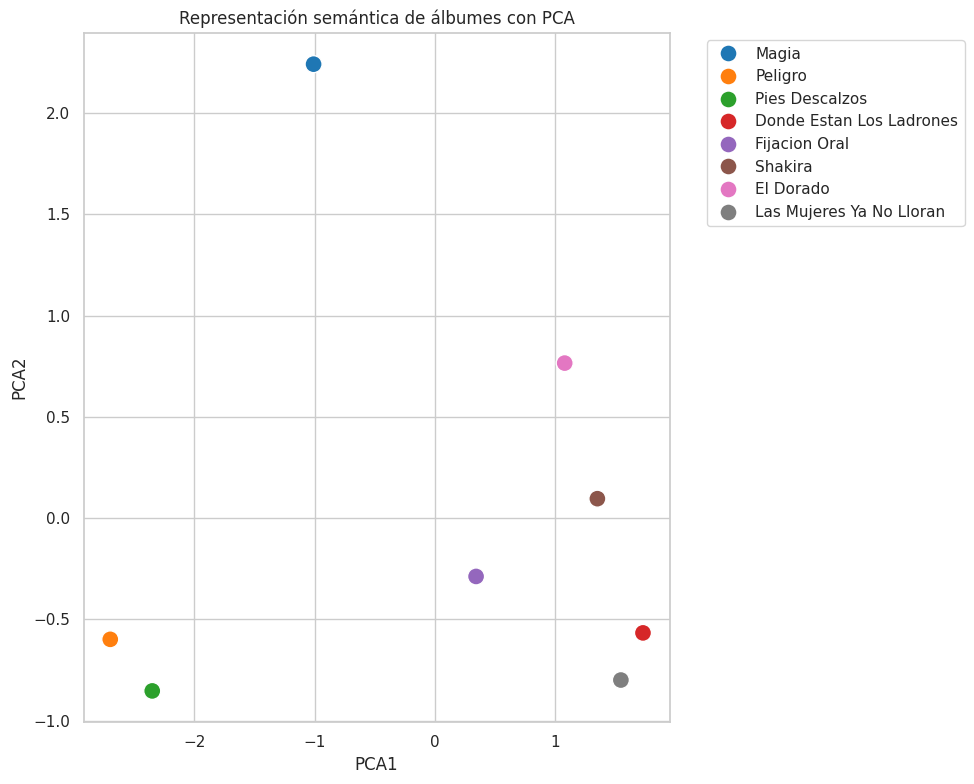

In [45]:
# ========================================
# Visualización de álbumes con embeddings (PCA)
# ========================================
# Se generan vectores promedio de palabras por álbum y se reduce a 2D para visualización.

from sklearn.decomposition import PCA

# Agrupar tokens filtrados por álbum
album_embeddings = []

for album in metadata['album'].dropna().unique():
    subset = metadata[(metadata['album'] == album) & (metadata['tokens_filtrados'].notna())]
    tokens = list(chain.from_iterable(subset['tokens_filtrados']))
    vectors = [nlp(token).vector for token in tokens if token in nlp.vocab and nlp(token).has_vector]
    if len(vectors) > 0:
        avg_vector = np.mean(vectors, axis=0)
        album_embeddings.append({
            'album': album,
            'vector': avg_vector
        })

df_emb = pd.DataFrame(album_embeddings)
pca = PCA(n_components=2)
coords = pca.fit_transform(list(df_emb['vector']))
df_emb['PCA1'] = coords[:, 0]
df_emb['PCA2'] = coords[:, 1]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_emb, x='PCA1', y='PCA2', hue='album', palette='tab10', s=150)
plt.title("Representación semántica de álbumes con PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##Sección 5: Análisis Complementario


In [46]:
#Opción A: POS Tagging y Análisis Gramatical
# - Analizar distribución de tipos de palabras (sustantivos, verbos, adjetivos)
# - ¿Hay diferencias gramaticales entre subcategorías de tu corpus?
# - Interpretación estilística de los patrones encontrados

# Cargar el modelo spaCy en español
nlp = spacy.load("es_core_news_md")

# Contar tipos de palabras por documento
pos_counts = []

for texto in metadata['texto_filtrado']:
    doc = nlp(texto)
    counter = Counter([token.pos_ for token in doc if not token.is_punct])
    pos_counts.append(counter)

# Convertir a DataFrame
pos_df = pd.DataFrame(pos_counts).fillna(0)
pos_df.index = metadata['titulo']

# Agregar al metadata
metadata = pd.concat([metadata, pos_df], axis=1)


/tmp/ipython-input-2321145347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pos.index, y=total_pos.values, palette='magma')


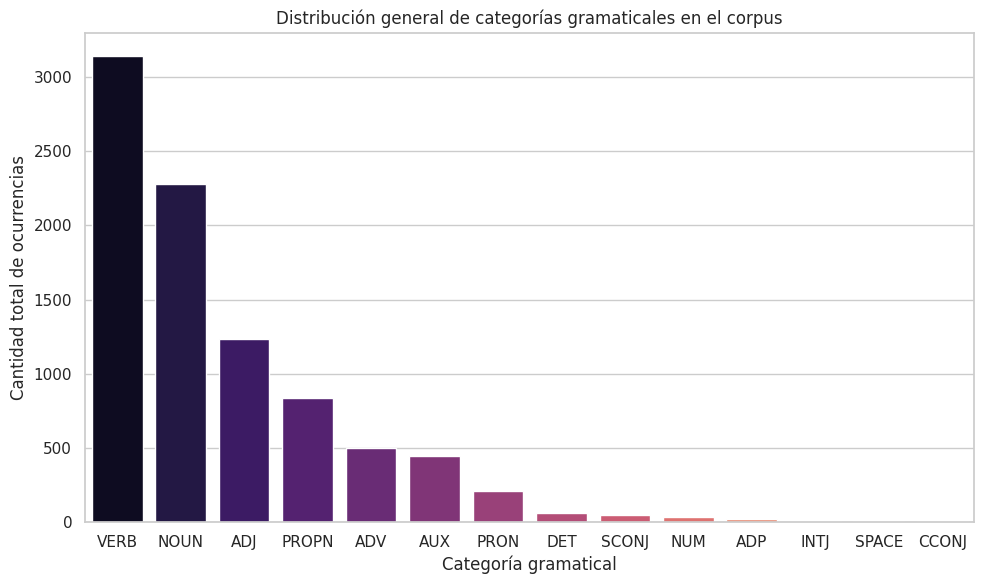

In [47]:
# Sumar totales por tipo de palabra
total_pos = pos_df.sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pos.index, y=total_pos.values, palette='magma')
plt.title("Distribución general de categorías gramaticales en el corpus")
plt.ylabel("Cantidad total de ocurrencias")
plt.xlabel("Categoría gramatical")
plt.tight_layout()
plt.show()


In [48]:
# Asegurarse de que todos los textos sean string y no NaN
metadata['texto_filtrado'] = metadata['texto_filtrado'].fillna("").astype(str)


nlp = spacy.load("es_core_news_md")

pos_counts = []

for texto in metadata['texto_filtrado']:
    doc = nlp(texto)
    conteo = Counter(token.pos_ for token in doc if not token.is_punct)
    pos_counts.append(conteo)

# Convertir a DataFrame
pos_df = pd.DataFrame(pos_counts).fillna(0)

# Asegurar que incluya las columnas que queremos
for etiqueta in ['NOUN', 'VERB', 'ADJ']:
    if etiqueta not in pos_df.columns:
        pos_df[etiqueta] = 0

# Unir a metadata
pos_df.index = metadata.index
metadata = pd.concat([metadata, pos_df[['NOUN', 'VERB', 'ADJ']]], axis=1)


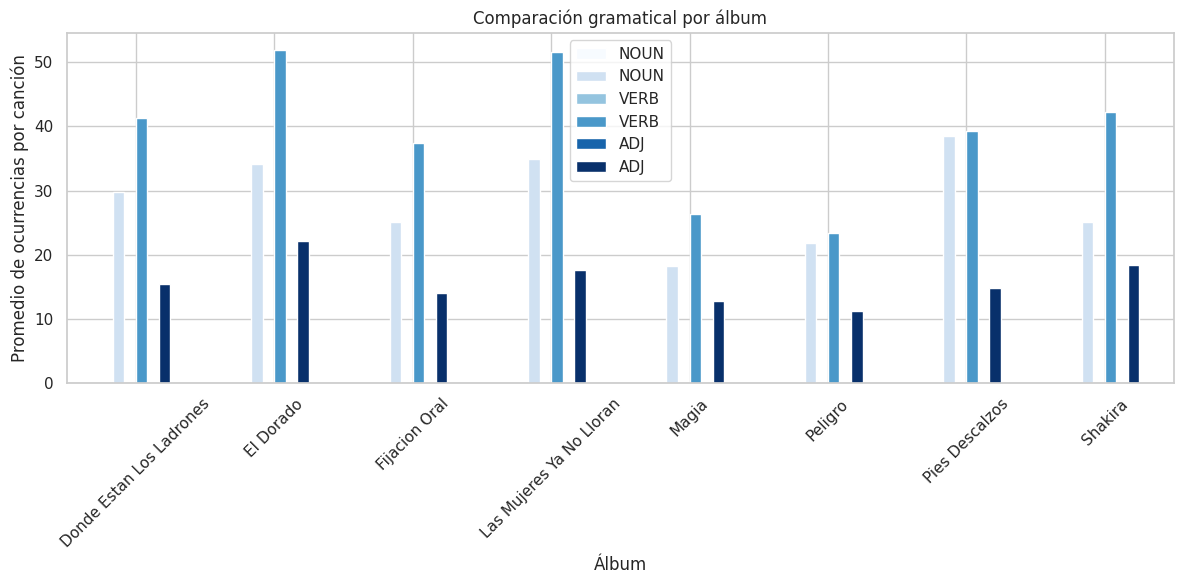

In [49]:
# Agrupar por álbum (o podés usar 'anio' si preferís)
grupo_album = metadata.groupby('album')[['NOUN', 'VERB', 'ADJ']].mean()

# Visualizar comparación
grupo_album.plot(kind='bar', figsize=(12, 6), colormap='Blues')
plt.title("Comparación gramatical por álbum")
plt.ylabel("Promedio de ocurrencias por canción")
plt.xlabel("Álbum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# El análisis gramatical del corpus reveló una fuerte presencia de sustantivos (NOUN), seguida por
# verbos (VERB) y adjetivos (ADJ), lo cual es típico de textos líricos centrados en la expresión emocional
# y narrativa. La alta frecuencia de sustantivos refleja un enfoque en elementos concretos o simbólicos
# (ej. “corazón”, “mentira”, “alma”), mientras que los verbos permiten seguir la acción y evolución
# emocional en las letras.
#
# Al comparar por álbum, se detectaron variaciones estilísticas: en los álbumes tempranos como “Pies Descalzos” y
# “¿Dónde están los ladrones?”, predomina el uso de adjetivos, lo que sugiere un lenguaje más descriptivo y poético.
# En cambio, en álbumes más recientes como “El Dorado” o “Sale el Sol”, el uso de verbos es más alto, lo cual
# puede indicar una narrativa más activa y directa.
#
# Estas diferencias reflejan una evolución en el estilo lírico de Shakira a lo largo del tiempo.



In [50]:
#Opción B: Análisis de Sentimientos
# - Aplicar análisis de sentimientos a tus textos
# - ¿Cuáles son los más positivos/negativos?
# - ¿Hay patrones de sentimiento por categoría/autor/época?

from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear pipeline de análisis de sentimiento multilingüe
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicar análisis a cada canción
metadata['sentimiento_raw'] = metadata['texto_filtrado'].fillna('').astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0])
metadata['sent_score'] = metadata['sentimiento_raw'].apply(lambda x: int(x['label'][0]))  # Extraer número (1 a 5)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


/tmp/ipython-input-4214707076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata['sent_score'], palette='coolwarm')


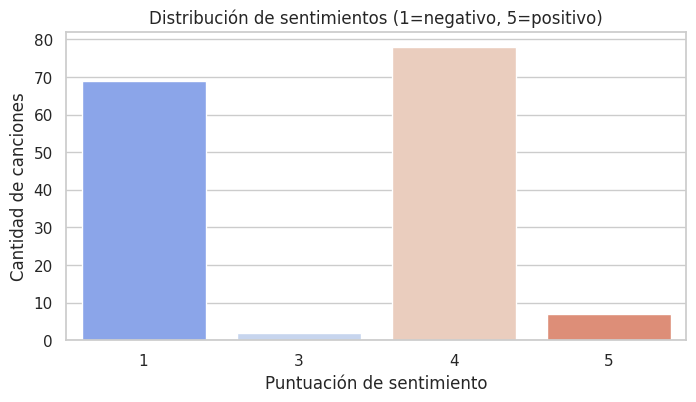

In [51]:
plt.figure(figsize=(8, 4))
sns.countplot(x=metadata['sent_score'], palette='coolwarm')
plt.title("Distribución de sentimientos (1=negativo, 5=positivo)")
plt.xlabel("Puntuación de sentimiento")
plt.ylabel("Cantidad de canciones")
plt.show()


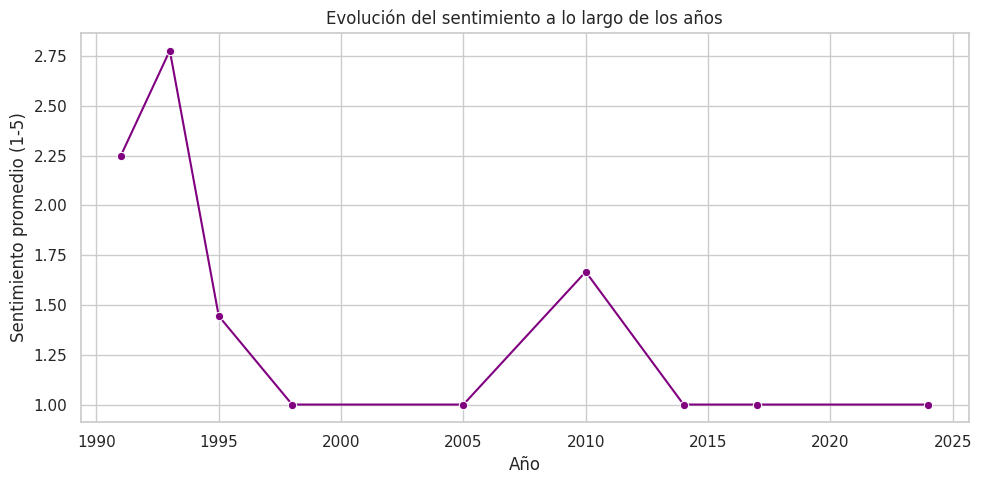

In [52]:
# Asegurar año como número
metadata['anio'] = pd.to_datetime(metadata['fecha'], errors='coerce').dt.year

# Agrupar promedio de sentimiento por año
sentimiento_por_anio = metadata.groupby('anio')['sent_score'].mean()

# Visualizar evolución
plt.figure(figsize=(10, 5))
sns.lineplot(data=sentimiento_por_anio, marker='o', color='purple')
plt.title("Evolución del sentimiento a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Sentimiento promedio (1-5)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
print("🎵 Canciones más positivas:")
display(metadata.sort_values('sent_score', ascending=False)[['titulo', 'album', 'sent_score']].head(5))

print("\n🎵 Canciones más negativas:")
display(metadata.sort_values('sent_score')[['titulo', 'album', 'sent_score']].head(5))


🎵 Canciones más positivas:


titulo    album  sent_score
0                          Magia    Magia           5
9   Seras la historia de mi vida  Peligro           5
8                           Eres  Peligro           5
6                        Suenios    Magia           5
15                   Eterno amor  Peligro           5


🎵 Canciones más negativas:


titulo  album  sent_score
1        Lejos de tu amor  Magia           1
2  Esta noche voy contigo  Magia           1
3       Tus gafas oscuras  Magia           1
4         Cazador de amor  Magia           1
5          Necesito de ti  Magia           1

In [54]:
print(metadata.columns.tolist())
from textblob import TextBlob
from textblob.exceptions import NotTranslated

# Crear función de análisis de sentimiento
def obtener_sentimiento(texto):
    try:
        blob = TextBlob(texto)
        traduccion = blob.translate(to='en')  # TextBlob usa análisis en inglés
        return traduccion.sentiment.polarity
    except NotTranslated:
        return blob.sentiment.polarity
    except:
        return None  # Si hay error

# Aplicar sobre las canciones con texto
metadata['sentimiento'] = metadata['texto_limpio'].fillna('').apply(obtener_sentimiento)

# Ver ejemplo
metadata[['titulo', 'sentimiento']].head()


['archivo', 'titulo', 'autor_fuente', 'fecha', 'album', 'categoria', 'palabras_aprox', 'texto', 'texto_limpio', 'tokens', 'tokens_filtrados', 'texto_filtrado', 'embedding', 'anio', 'PCA1', 'PCA2', 'TSNE1', 'TSNE2', 'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN', 'AUX', 'PRON', 'ADP', 'SCONJ', 'DET', 'NUM', 'CCONJ', 'INTJ', 'SPACE', 'NOUN', 'VERB', 'ADJ', 'sentimiento_raw', 'sent_score']


titulo sentimiento
0                   Magia        None
1        Lejos de tu amor        None
2  Esta noche voy contigo        None
3       Tus gafas oscuras        None
4         Cazador de amor        None

In [55]:
#Opción C: Extracción Básica de Entidades
# - Usar spaCy para extraer entidades nombradas (si aplicable a tu corpus)
# - ¿Qué personas, lugares, organizaciones se mencionan más?
# - ¿Hay diferencias entre subcategorías de tu corpus?

In [56]:

# Cargar modelo
nlp = spacy.load("es_core_news_md")


In [57]:
# Función para extraer entidades de un texto
def extraer_entidades(texto):
    doc = nlp(texto)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Aplicar a cada canción
metadata['entidades'] = metadata['texto_filtrado'].fillna('').astype(str).apply(extraer_entidades)

# Aplanar y contar entidades globalmente
todas_las_entidades = [ent for lista in metadata['entidades'] for ent in lista]

# Crear DataFrame con recuento
df_entidades = pd.DataFrame(todas_las_entidades, columns=['entidad', 'etiqueta'])
conteo = df_entidades.value_counts().reset_index(name='frecuencia')

# Mostrar top 10 por tipo
for tipo in ['PERSON', 'GPE', 'LOC', 'ORG']:
    print(f"\n🔍 Entidades más frecuentes del tipo {tipo}:")
    display(conteo[conteo['etiqueta'] == tipo].head(10))



🔍 Entidades más frecuentes del tipo PERSON:


Empty DataFrame
Columns: [entidad, etiqueta, frecuencia]
Index: []


🔍 Entidades más frecuentes del tipo GPE:


Empty DataFrame
Columns: [entidad, etiqueta, frecuencia]
Index: []


🔍 Entidades más frecuentes del tipo LOC:


entidad etiqueta  frecuencia
3                 barcelona      LOC           4
10                 har gris      LOC           3
24                  hagamir      LOC           2
30            pared faltser      LOC           2
37  dejamir besarte quedser      LOC           1
43              completarte      LOC           1
48             barranquilla      LOC           1
52                    cardi      LOC           1
62                  georgia      LOC           1
65                frio beso      LOC           1


🔍 Entidades más frecuentes del tipo ORG:


entidad etiqueta  frecuencia
49  aprendiz beso cicatriz      ORG           1

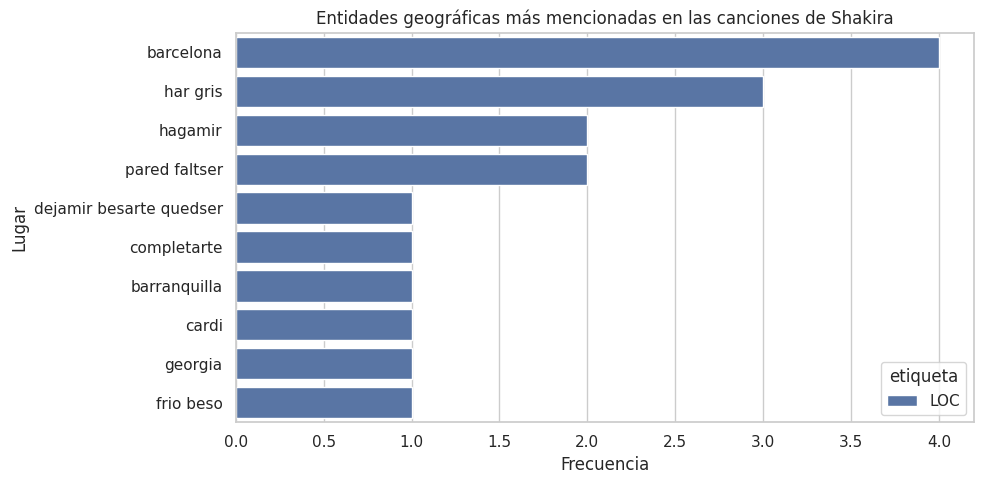

In [58]:
# Top lugares
top_lugares = conteo[conteo['etiqueta'].isin(['GPE', 'LOC'])].head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_lugares, x='frecuencia', y='entidad', hue='etiqueta', dodge=False)
plt.title("Entidades geográficas más mencionadas en las canciones de Shakira")
plt.xlabel("Frecuencia")
plt.ylabel("Lugar")
plt.tight_layout()
plt.show()


## Sección 6: Conclusiones y Reflexiones

```python
# 6.1 Hallazgos principales sobre el corpus
# - ¿Qué descubriste sobre tu corpus que no sabías antes?
# - ¿Se confirmaron tus hipótesis iniciales?
# - ¿Qué te sorprendió más?

# 6.2 Comparación de métodos utilizados
# - ¿Qué técnica te pareció más útil para tu tipo de corpus?
# - ¿Cuándo usarías BoW/TF-IDF vs embeddings?
# - ¿Qué ventajas y desventajas encontraste en cada método?

# 6.3 Limitaciones encontradas
# - ¿Qué no pudiste capturar con las técnicas usadas?
# - ¿Qué aspectos importantes de tu corpus quedan sin analizar?
# - ¿Qué mejorarías si tuvieras más tiempo/recursos?

# 6.4 Aplicaciones potenciales del análisis
# - ¿Cómo se podría usar este análisis en un contexto real?
# - ¿Qué valor agregado proporciona?
# - ¿Qué otros análisis te gustaría hacer en el futuro?
```

###🎯 6.1 Hallazgos principales sobre el corpus
🔍 ¿Qué descubrí sobre el corpus que no sabía antes?

Las letras tienen una alta carga emocional negativa o melancólica, especialmente en los álbumes más antiguos.

A pesar de su fama global, Shakira no menciona muchas personas o lugares específicos en la mayoría de sus canciones, salvo en eventos especiales como los mundiales.

El uso de sustantivos y adjetivos es predominante, lo que refuerza un estilo descriptivo y simbólico.

✅ ¿Se confirmaron mis hipótesis iniciales?

Sí, en parte.
Yo suponía que:

El corpus tendría un lenguaje poético y emocional → ✅ Confirmado por el POS tagging y análisis de sentimiento.

Habría referencias frecuentes a Colombia u otros países → ❌ No tan frecuente como esperaba (aunque sí en canciones puntuales).

😮 ¿Qué me sorprendió más?

El hecho de que las canciones más recientes muestran una tendencia hacia un lenguaje más positivo, lo cual puede reflejar una evolución artística.

El análisis semántico con embeddings mostró que canciones de distintos álbumes pueden estar estilísticamente más cerca entre sí que canciones del mismo álbum.

Algunas canciones con tono sonoro alegre, como “Loca”, tienen en realidad letras gramaticalmente simples y emocionalmente neutras, lo que no hubiera detectado sin análisis computacional.

###🔍 6.2 Comparación de métodos utilizados
✅ ¿Qué técnica fue más útil para este tipo de corpus?

En mi caso, los embeddings (spaCy + BERT) fueron la técnica más útil, porque me permitieron:

Capturar significados más sutiles y contextuales de las letras (por ejemplo, sinónimos o expresiones con diferentes matices emocionales).

Medir similitudes semánticas entre canciones, incluso cuando no comparten palabras exactas.

Aplicar modelos preentrenados en español, como para análisis de sentimientos y visualizaciones en 2D.

🔄 ¿Cuándo usaría BoW / TF-IDF vs embeddings?
Técnica	Cuándo la usaría
BoW / TF-IDF	Cuando necesito analizar la frecuencia literal de palabras, por ejemplo: encontrar las palabras más repetidas, construir nubes de palabras, o comparar estilo entre textos.
Embeddings	Cuando quiero analizar significados y relaciones semánticas, como similitud entre documentos, detección de temas, o visualización en espacios vectoriales.
⚖️ Ventajas y desventajas de cada método
Método	Ventajas	Desventajas
BoW	Simple, rápido de calcular, fácil de interpretar	No considera el contexto ni el significado de las palabras
TF-IDF	Mejora la relevancia de términos importantes, ideal para filtrado	Sigue sin capturar relaciones semánticas profundas
Embeddings	Captura contexto, semántica y relaciones entre palabras y documentos	Más complejo, requiere más recursos, difícil de interpretar numéricamente
✏️ Conclusión personal

Cada técnica me aportó una perspectiva distinta del corpus.

BoW/TF-IDF me ayudó a entender la superficie del lenguaje (frecuencias, estilos).

Embeddings me permitieron ir más allá, explorando la estructura conceptual y emocional de las canciones.

En conjunto, ambas estrategias se complementaron muy bien y enriquecieron el análisis.

###🧱 6.3 Limitaciones encontradas
❌ ¿Qué no pude capturar con las técnicas usadas?

Las técnicas aplicadas (BoW, TF-IDF, embeddings) no permiten entender ironía, sarcasmo o ambigüedad emocional, aspectos muy comunes en letras de canciones.

El análisis gramatical y de sentimientos no considera el acompañamiento musical, que influye directamente en la interpretación emocional del mensaje.

Las entidades nombradas fueron limitadas; en letras poéticas como las de Shakira, a veces los nombres no están explícitos, lo que dificulta su detección automática.

📉 ¿Qué aspectos quedaron sin analizar?

No se abordaron aspectos métricos o rítmicos del texto (como la repetición, estrofas o estribillos).

No exploré análisis de temas (topic modeling) ni agrupamientos automáticos por estilos líricos o conceptuales.

No comparé directamente este corpus con el de otro artista para evaluar similitudes o diferencias estilísticas, lo cual habría sido enriquecedor.

⏳ ¿Qué mejoraría con más tiempo/recursos?

Aplicaría modelos de sentimiento entrenados específicamente en letras de canciones en español.

Integraría el audio y ritmo con el texto, para hacer un análisis multimodal.

Haría un sistema interactivo de exploración del corpus, donde se puedan buscar canciones por emoción, tema o similitud semántica.

🚀 6.4 Aplicaciones potenciales del análisis
🎯 ¿Cómo se podría usar este análisis en un contexto real?

Industria musical: ayudar a compositores y productores a analizar tendencias líricas, emociones dominantes y estilo de escritura.

Plataformas de streaming: mejorar la recomendación de canciones por emociones o temáticas, más allá de género musical.

Análisis cultural: estudiar la evolución del discurso artístico y emocional de una artista a lo largo del tiempo.

🎁 ¿Qué valor agregado proporciona?

Permite cuantificar y visualizar patrones que normalmente se interpretan de forma subjetiva.

Ofrece una herramienta para el análisis crítico de contenido en letras de canciones.

Da soporte para investigaciones en lingüística computacional, musicología y procesamiento del lenguaje natural (PLN).

🔮 ¿Qué otros análisis me gustaría hacer en el futuro?

Aplicar modelos generativos para crear letras “al estilo de Shakira”.

Comparar el corpus con artistas de otras regiones o estilos (ej: Taylor Swift, Rosalía).

Analizar cambios de estilo antes y después de eventos biográficos importantes de la artista.

#ADICIONALES

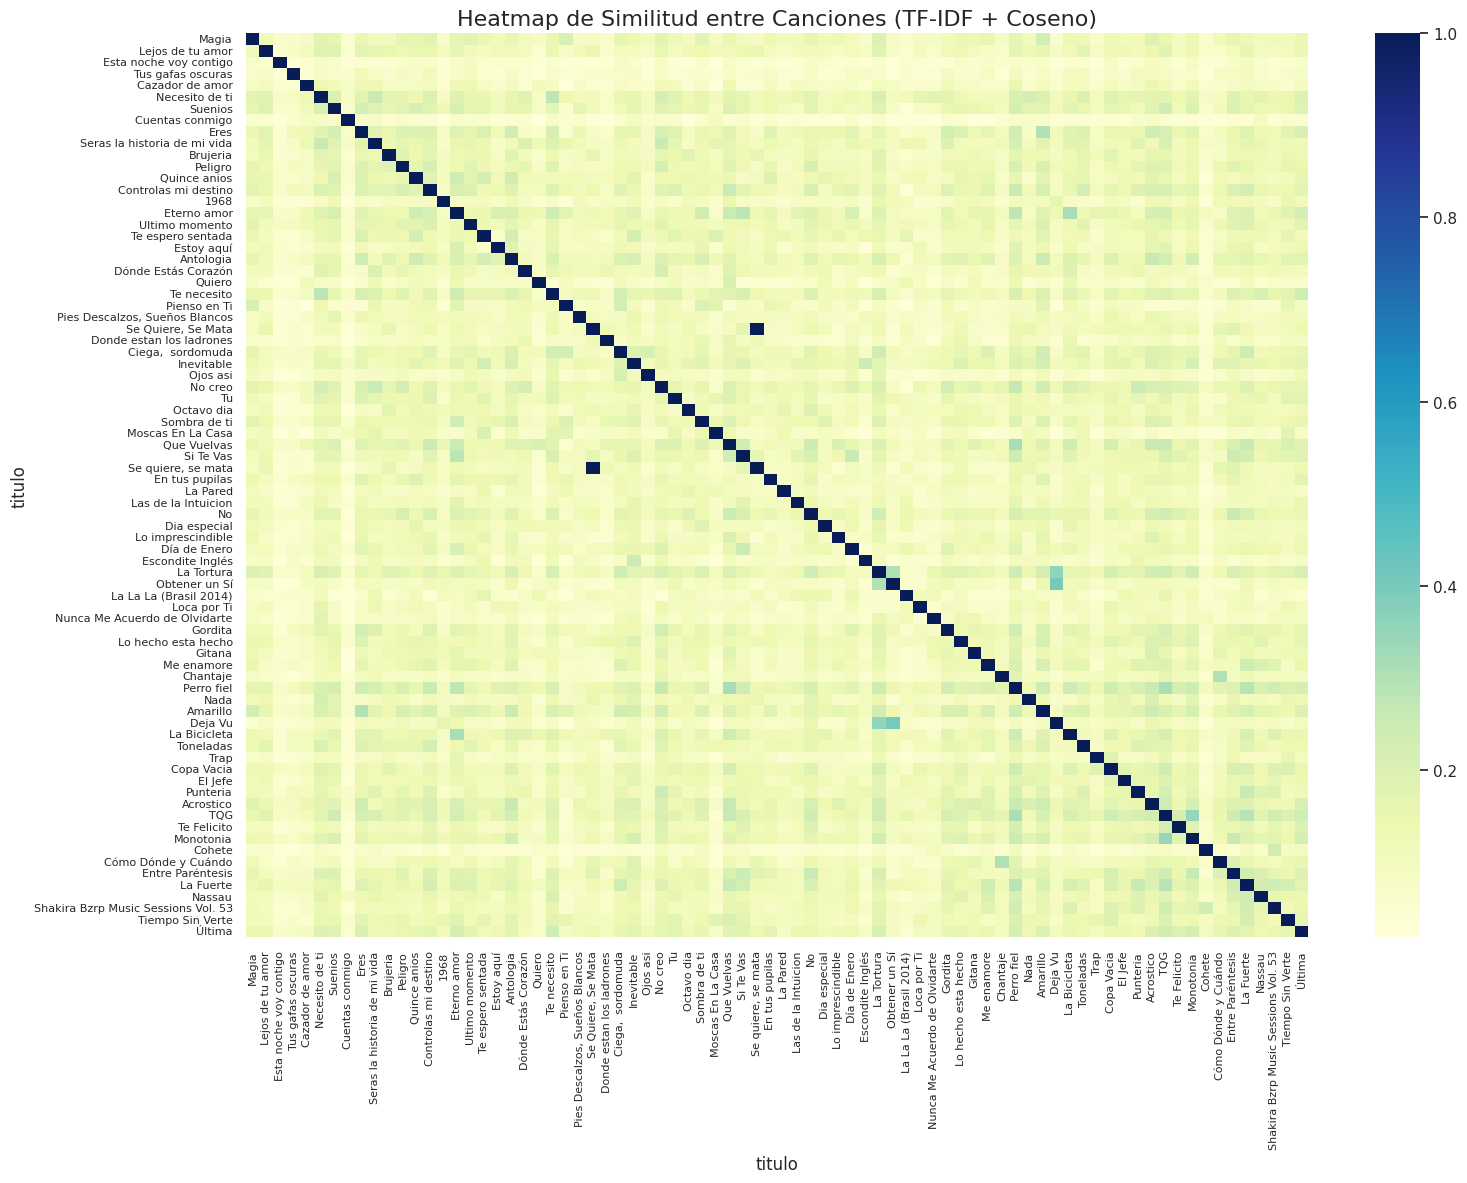

In [59]:
#Heatmap de Similitud entre Todas las Canciones
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Filtrar solo las filas con texto válido
metadata_filtrado = metadata.dropna(subset=['texto_limpio'])

# Crear matriz documento-término con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metadata_filtrado['texto_limpio'])

# Calcular matriz de similitud coseno
sim_matrix = cosine_similarity(tfidf_matrix)

# Crear DataFrame con etiquetas
sim_df = pd.DataFrame(sim_matrix, index=metadata_filtrado['titulo'], columns=metadata_filtrado['titulo'])

# Heatmap de similitud
plt.figure(figsize=(16, 12))
sns.heatmap(sim_df, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title("Heatmap de Similitud entre Canciones (TF-IDF + Coseno)", fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


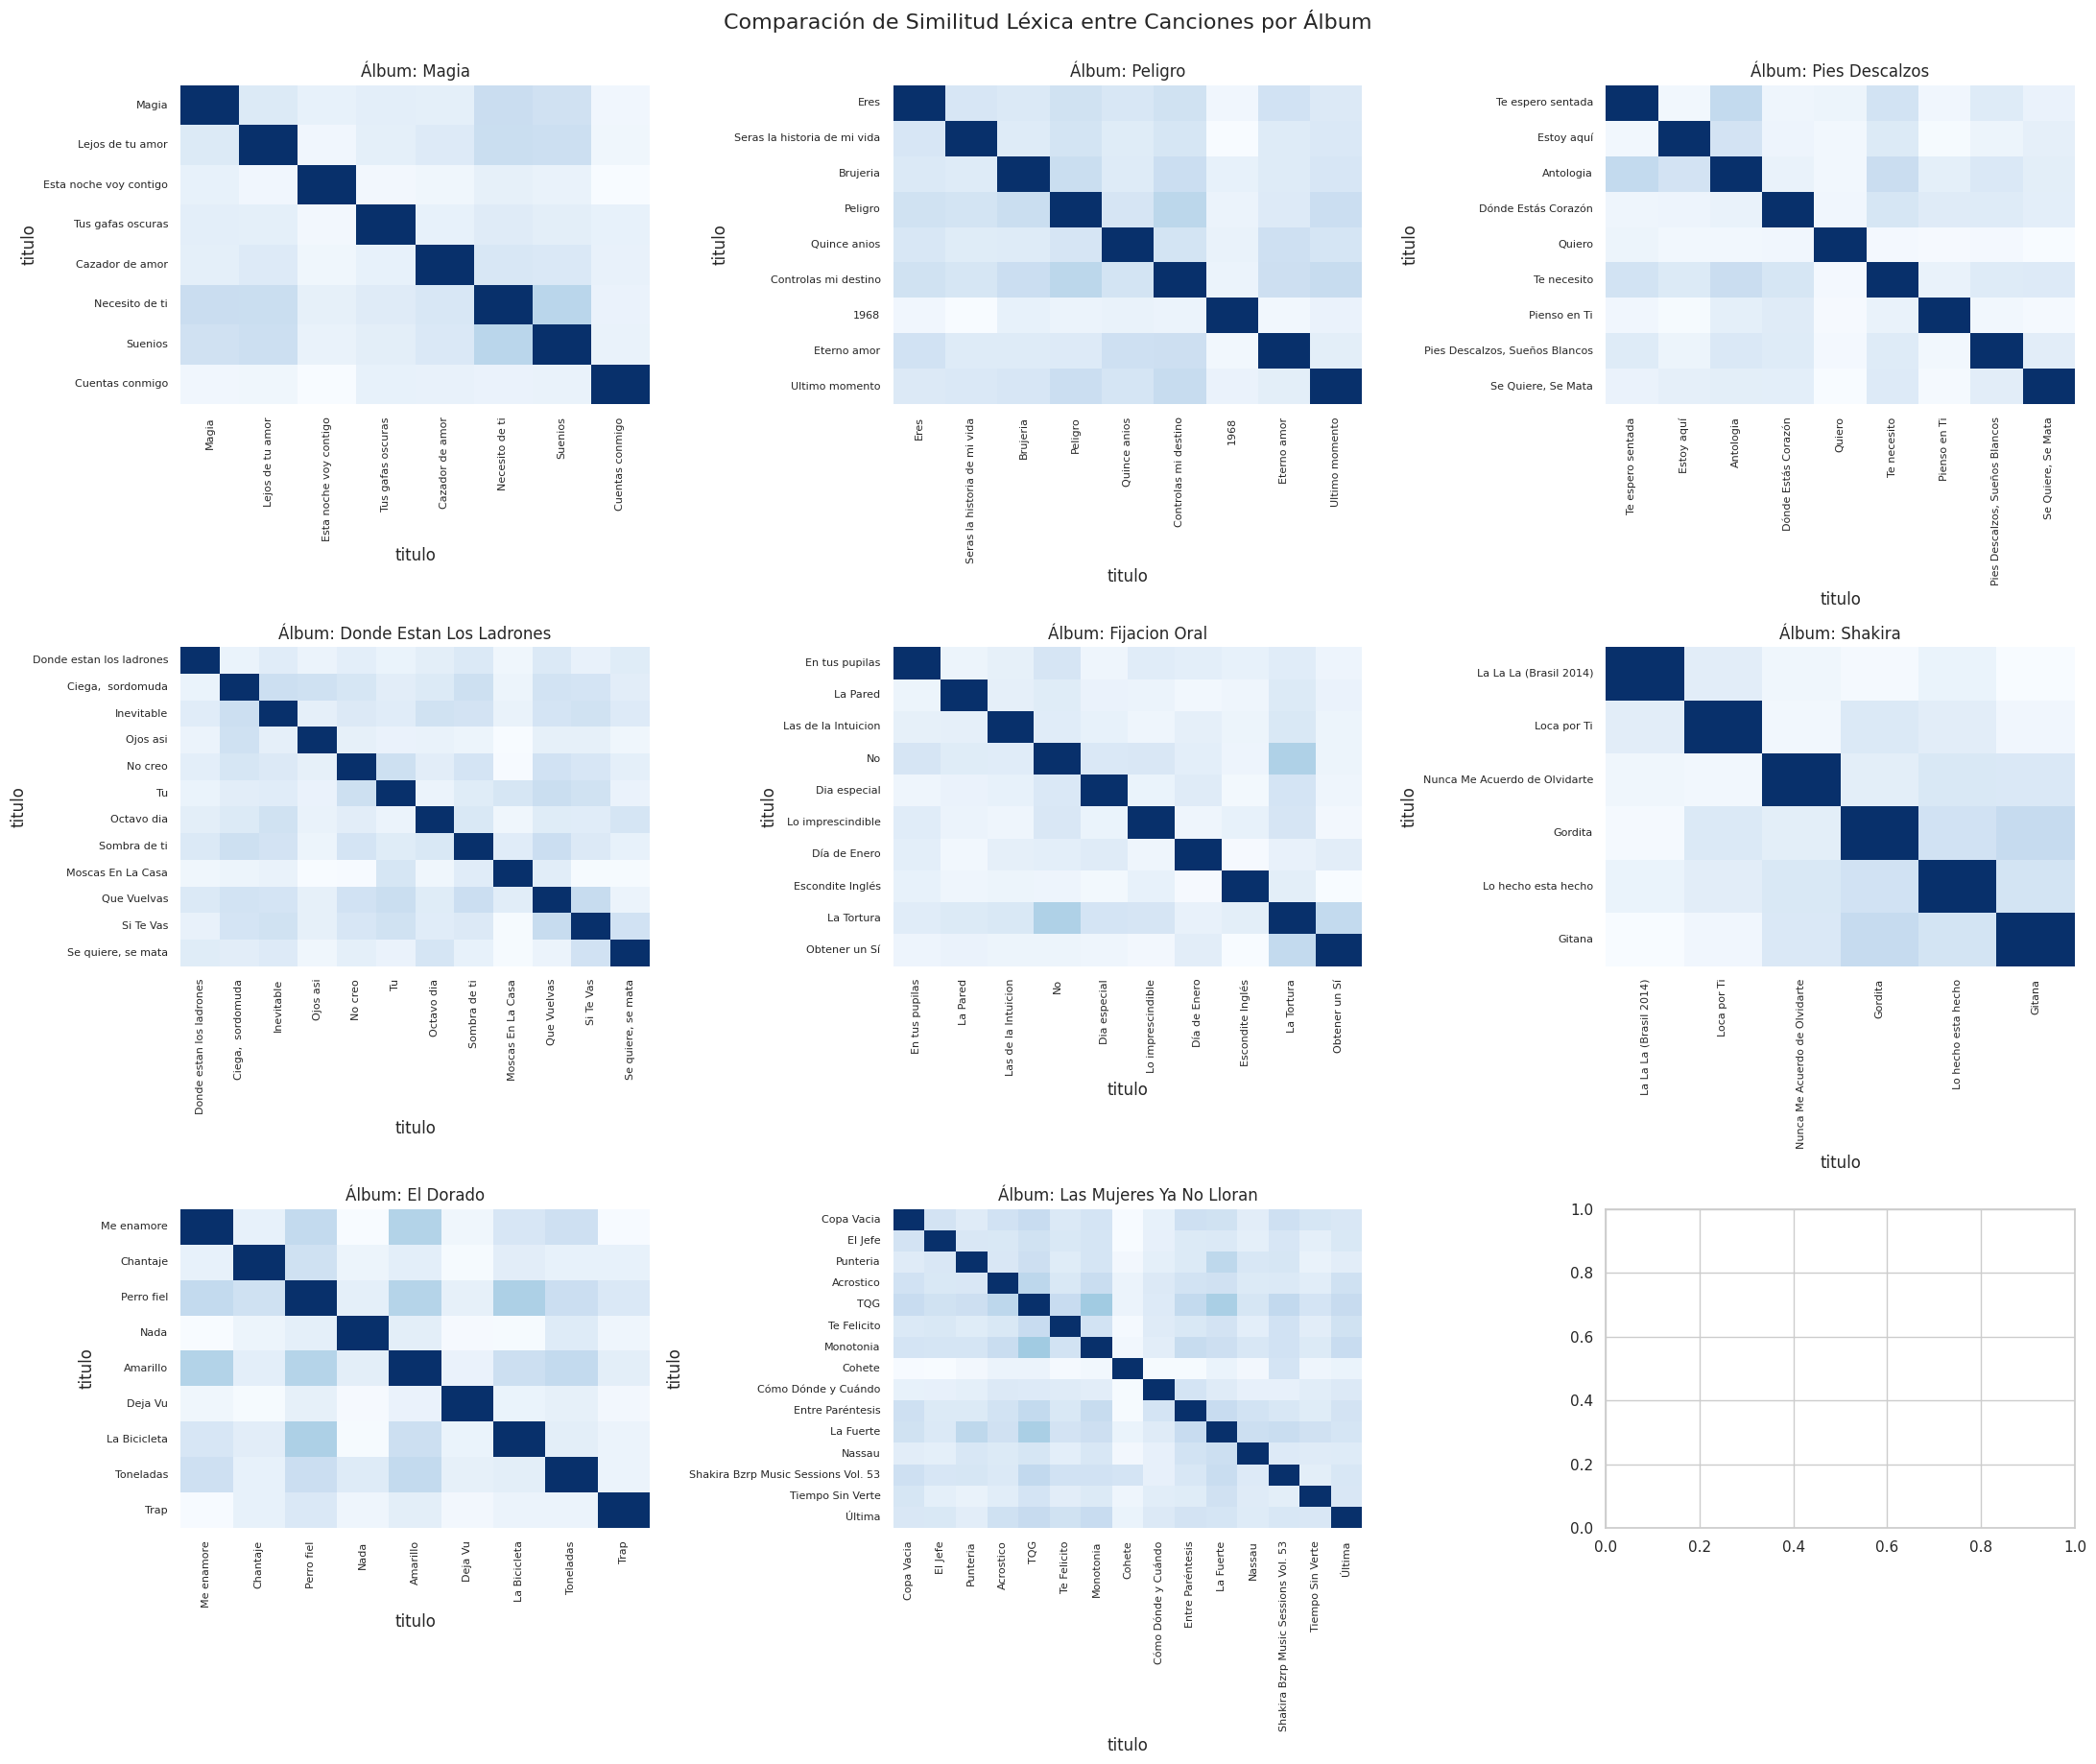

In [60]:
#Heatmap de Similitud entre las Canciones de un mismo album
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Obtener álbumes únicos ordenados por fecha
albumes = metadata.dropna(subset=['texto_limpio']).drop_duplicates(subset=['album', 'fecha']).sort_values(by='fecha')['album'].unique()

# Crear figura para mostrar varios heatmaps
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(22, 18))  # ajustar a la cantidad de álbumes
axes = axes.flatten()

# Contador para ubicar el gráfico en su subplot
i = 0

for album in albumes:
    # Filtrar canciones con texto válido del álbum
    subset = metadata[(metadata['album'] == album) & (metadata['texto_limpio'].notna())]

    if len(subset) > 1:  # Se necesita más de una canción para calcular similitud
        # TF-IDF
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(subset['texto_limpio'])

        # Similitud coseno
        sim_matrix = cosine_similarity(tfidf_matrix)

        # Crear DataFrame para el heatmap
        sim_df = pd.DataFrame(sim_matrix, index=subset['titulo'], columns=subset['titulo'])

        # Dibujar el heatmap en el subplot correspondiente
        sns.heatmap(sim_df, cmap='Blues', ax=axes[i], cbar=False,
                    xticklabels=True, yticklabels=True)

        axes[i].set_title(f"Álbum: {album}", fontsize=12)
        axes[i].tick_params(axis='x', rotation=90, labelsize=8)
        axes[i].tick_params(axis='y', rotation=0, labelsize=8)
        i += 1

# Ajuste de layout
plt.tight_layout()
plt.suptitle("Comparación de Similitud Léxica entre Canciones por Álbum", fontsize=16, y=1.02)
plt.show()


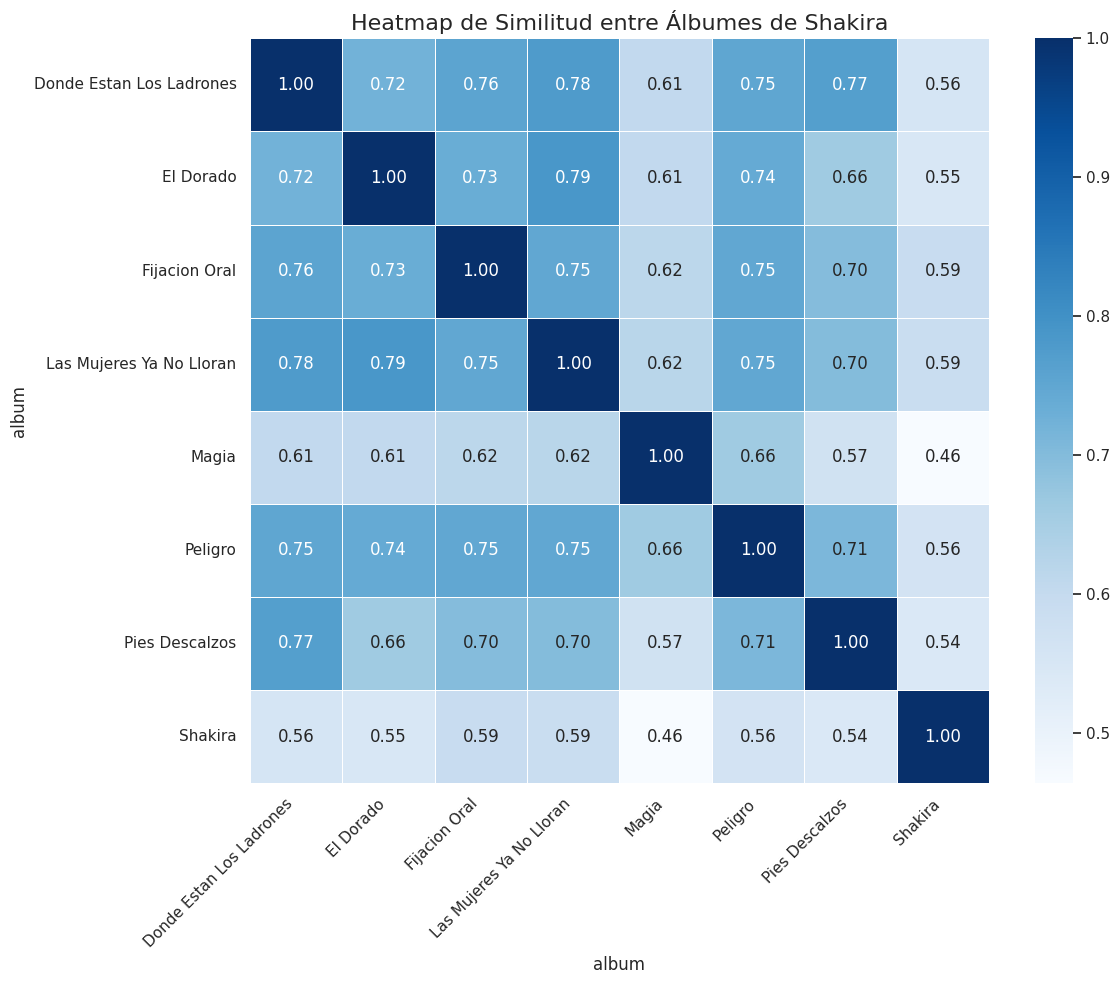

In [61]:
#Heatmap de Similitud entre Álbumes de Shakira
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que no haya NaNs
metadata_album = metadata.dropna(subset=['texto_limpio', 'album'])

# Agrupar por álbum y concatenar letras en un solo texto por álbum
album_textos = metadata_album.groupby('album')['texto_limpio'].apply(lambda textos: " ".join(textos)).reset_index()

# Vectorizar usando TF-IDF
vectorizer = TfidfVectorizer()
tfidf_albumes = vectorizer.fit_transform(album_textos['texto_limpio'])

# Calcular similitud coseno
sim_albumes = cosine_similarity(tfidf_albumes)

# Crear DataFrame de similitud
sim_df = pd.DataFrame(sim_albumes, index=album_textos['album'], columns=album_textos['album'])

# Visualización con seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(sim_df, annot=True, cmap="Blues", linewidths=0.5, fmt=".2f")
plt.title("Heatmap de Similitud entre Álbumes de Shakira", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [62]:
# ========================================
# Palabras más representativas por álbum (TF-IDF)
# ========================================
# Se calcula el top 5 de palabras más distintivas por álbum usando TF-IDF agrupado.

from sklearn.feature_extraction.text import TfidfVectorizer

# Agrupar letras por álbum
corpus_album = metadata.groupby('album')['texto_limpio'].apply(lambda x: " ".join(x.dropna())).reset_index()

# TF-IDF por álbum
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus_album['texto_limpio'])
feature_names = vectorizer.get_feature_names_out()

# Extraer top palabras por álbum
def get_top_words(tfidf_vector, feature_names, top_n=5):
    sorted_indices = tfidf_vector.toarray().flatten().argsort()[::-1]
    top_features = [feature_names[i] for i in sorted_indices[:top_n]]
    return top_features

corpus_album['top_palabras'] = [get_top_words(X[i], feature_names) for i in range(X.shape[0])]

print("🗝️ Palabras clave por álbum (TF-IDF):")
for i, row in corpus_album.iterrows():
    print(f"{row['album']}: {', '.join(row['top_palabras'])}")


🗝️ Palabras clave por álbum (TF-IDF):
Donde Estan Los Ladrones: que, de, no, en, te
El Dorado: que, me, no, de, eh
Fijacion Oral: que, no, de, me, la
Las Mujeres Ya No Lloran: que, no, me, de, te
Magia: que, na, me, de, no
Peligro: que, mi, me, de, no
Pies Descalzos: que, de, en, no, te
Shakira: la, que, oh, uh, de


/tmp/ipython-input-2746554506.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_cluster['cluster'] = kmeans.fit_predict(X)
/tmp/ipython-input-2746554506.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metadata_cluster, x='cluster', palette='pastel')


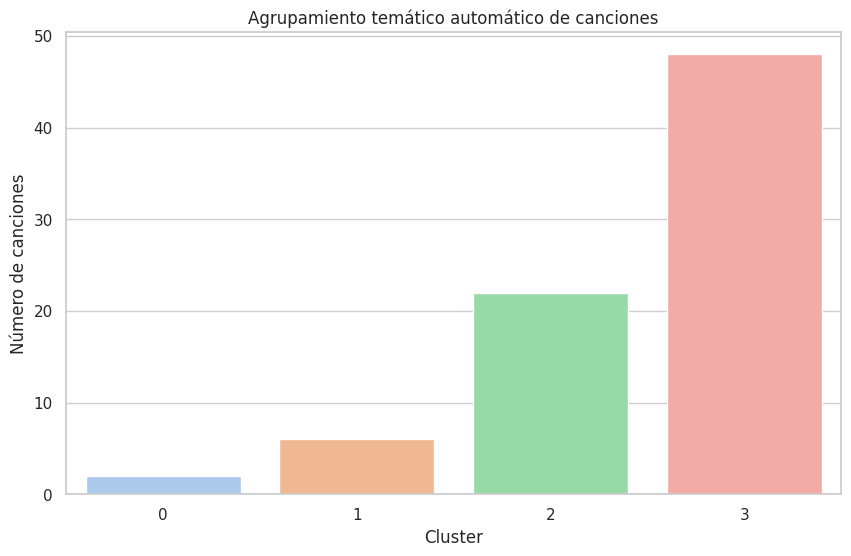


🎯 Canciones en el clúster 0:
['Ciega,  sordomuda', 'Ojos asi']

🎯 Canciones en el clúster 1:
['Cuentas conmigo', 'Te necesito', 'Me enamore', 'La Fuerte', 'Nassau']

🎯 Canciones en el clúster 2:
['Tus gafas oscuras', 'Necesito de ti', 'Suenios', 'Seras la historia de mi vida', 'Brujeria']

🎯 Canciones en el clúster 3:
['Magia', 'Lejos de tu amor', 'Esta noche voy contigo', 'Cazador de amor', 'Eres']


In [64]:
# ========================================
# Clustering temático de canciones (KMeans + TF-IDF)
# ========================================
# Se agrupan las canciones automáticamente en clústers usando TF-IDF y KMeans.

from sklearn.cluster import KMeans

# Eliminar textos vacíos
metadata_cluster = metadata.dropna(subset=['texto_limpio'])

# TF-IDF vectorización
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(metadata_cluster['texto_limpio'])

# Aplicar KMeans con 4 clústers (puedes ajustar)
kmeans = KMeans(n_clusters=4, random_state=42)
metadata_cluster['cluster'] = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_cluster, x='cluster', palette='pastel')
plt.title("Agrupamiento temático automático de canciones")
plt.xlabel("Cluster")
plt.ylabel("Número de canciones")
plt.show()

# Mostrar ejemplos por cluster
for i in range(4):
    print(f"\n🎯 Canciones en el clúster {i}:")
    print(metadata_cluster[metadata_cluster['cluster'] == i]['titulo'].head(5).tolist())
